# 0.0. IMPORTS

In [1]:
import pandas         as pd
import numpy          as np
import seaborn        as sns
import plotly.express as px

from matplotlib            import pyplot as plt
from IPython.display       import Image
from IPython.core.display  import HTML

import inflection
import warnings

## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 20
    
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
    
warnings.filterwarnings( 'ignore' )
pd.options.display.float_format = '{:.2f}'.format

In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Loading Data

In [4]:
df_raw = pd.read_csv( 'data/kc_house_data.csv', low_memory=False )

In [5]:
df_raw.sample()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15
6951  3123049142  20140805T000000 452000.00         3       2.25         2600     14810    1.00           0     2          4      8        1490           1110      1956             0    98166 47.43 -122.34           2450       16715

# 1.0. DATA DESCRIPTION

In [6]:
df1 = df_raw.copy()

## 1.1. Data Dimensions

In [7]:
print(f"Number Of Rows: {df1.shape[0]}" )
print(f"Number Of Cols: {df1.shape[1]}" )

Number Of Rows: 21613
Number Of Cols: 21


## 1.2. Data Types

In [8]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.3. Check NA

In [9]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 1.4. Change Types

In [10]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.5. Change Types

In [11]:
df1['price'] = df1['price'].astype( int ) 

## 1.6. Descreptive Statistical

In [12]:
num_attributes = df1.drop( 'date', axis=1 )

In [13]:
# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'] )

In [14]:
m

attributes        min           max         range          mean        median           std  skew  kurtosis
0              id 1000102.00 9900000190.00 9899000088.00 4580301520.86 3904930410.00 2876499023.43  0.24     -1.26
1           price   75000.00    7700000.00    7625000.00     540088.14     450000.00     367118.70  4.02     34.59
2        bedrooms       0.00         33.00         33.00          3.37          3.00          0.93  1.97     49.06
3       bathrooms       0.00          8.00          8.00          2.11          2.25          0.77  0.51      1.28
4     sqft_living     290.00      13540.00      13250.00       2079.90       1910.00        918.42  1.47      5.24
5        sqft_lot     520.00    1651359.00    1650839.00      15106.97       7618.00      41419.55 13.06    285.08
6          floors       1.00          3.50          2.50          1.49          1.50          0.54  0.62     -0.48
7      waterfront       0.00          1.00          1.00          0.01          0.00          0.09 11.39    127.63
8            view       0.00          4.00          4.00          0.23          0.00          0.77  3.40     10.89
9       condition       1.00          5.00          4.00          3.41          3.00          0.65  1.03      0.53
10          grade       1.00         13.00         12.00          7.66          7.00          1.18  0.77      1.19
11     sqft_above     290.00       9410.00       9120.00       1788.39       1560.00        828.07  1.45      3.40
12  sqft_basement       0.00       4820.00       4820.00        291.51          0.00        442.56  1.58      2.72
13       yr_built    1900.00       2015.00        115.00       1971.01       1975.00         29.37 -0.47     -0.66
14   yr_renovated       0.00       2015.00       2015.00         84.40          0.00        401.67  4.55     18.70
15        zipcode   98001.00      98199.00        198.00      98077.94      98065.00         53.50  0.41     -0.85
16            lat      47.16         47.78          0.62         47.56         47.57          0.14 -0.49     -0.68
17           long    -122.52       -121.31          1.20       -122.21       -122.23          0.14  0.89      1.05
18  sqft_living15     399.00       6210.00       5811.00       1986.55       1840.00        685.38  1.11      1.60
19     sqft_lot15     651.00     871200.00     870549.00      12768.46       7620.00      27303.55  9.51    150.76

In [15]:
df1['date'].max()

Timestamp('2015-05-27 00:00:00')

In [16]:
df1['date'].min()

Timestamp('2014-05-02 00:00:00')

# 2.0.  FEATURE ENGINEERING

In [17]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses

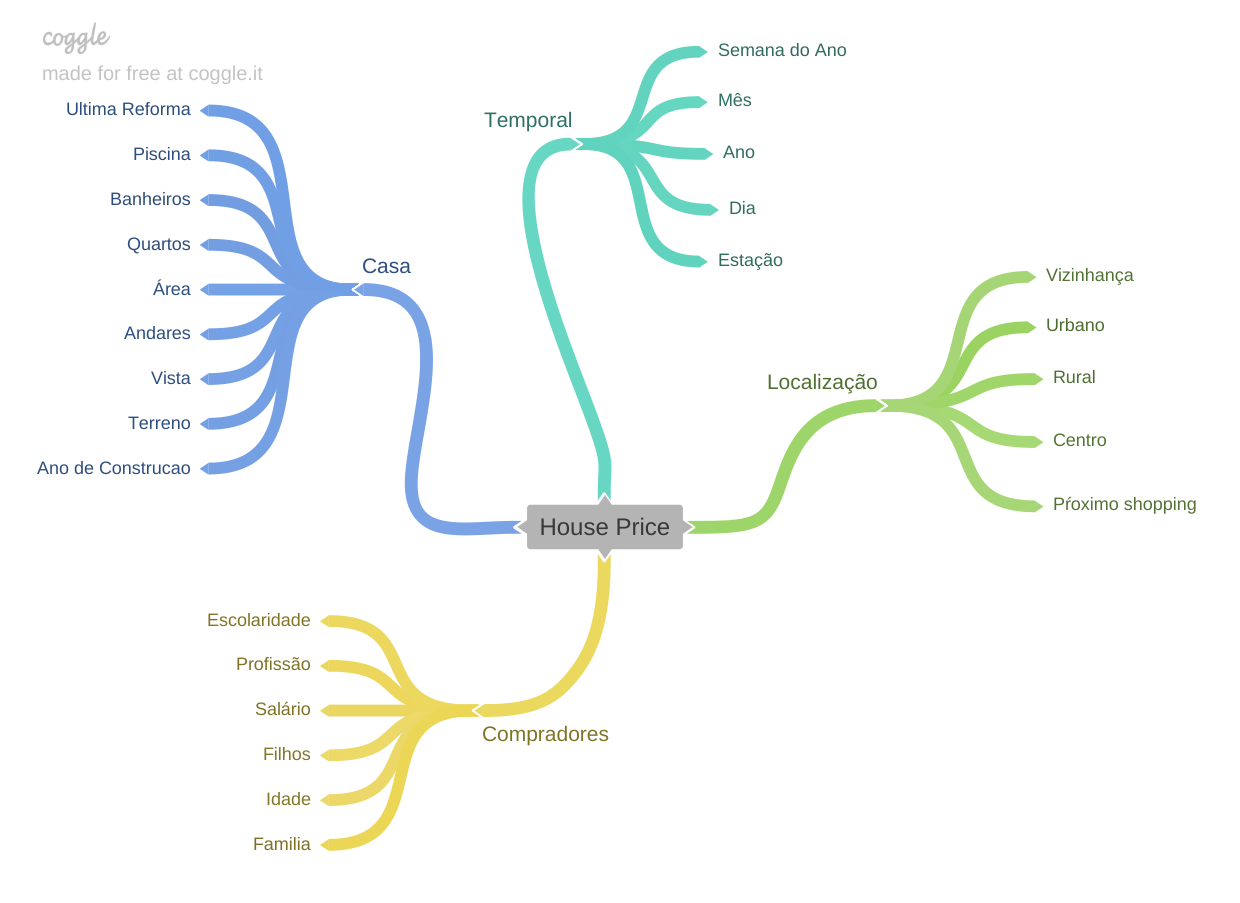

In [18]:
Image( 'image/House_Price.png' )

## 2.2. Criacao de Hipoteses

### 2.2.4. Lista de Hipoteses

#### 1. Casas em determinadas regiões tem menos quartos.

#### 2. Casas construídas após 1970 costumam ter mais andares

#### 3. Casas com vista para a aguá deveriam custar em média 30% a mais.

#### 4. Casas com melhor vista deveriam ter o preço maior.

#### 5. Casas  em melhores condiçoes são em média 50% mais caras.

#### 6. Casas com qualidade superior a 7 deveriam ser 40% mais caras. 

#### 7. Casas que possuem porão deveriam ser em média 20% mais caras. 

#### 8. Casas contruidas antes de 1970 deveriam ser mais baratas.

#### 9. Casas reformadas nos ultimos 5 anos deveriam 30% mais caras.

#### 10. Casas que possuem vizinhos com grandes áreas deveriam ter área maior.

#### 11. Casas Contruidas nos ultimos 20 anos tem qualidade superior

#### 12. Deveriam ser vendidas mais casas em estações de clima quente.

#### 13. Deveriam ser vendidas mais casas na segunda metade do mês.


## 2.3. Feature Engineering 

In [19]:
# Ano
df2['year'] = df2['date'].dt.year

# Mes
df2['month'] = df2['date'].dt.month

# Dia
df2['day'] = df2['date'].dt.day

# Semana do Ano
df2['week_of_year'] = df2['date'].dt.weekofyear

# Estações
df2['season'] = df2['month'].apply( lambda x: 'winter' if x in [12, 1 ,2] else 'spring' if x in [3, 4, 5] else 'summer' if x in [6, 7, 8] else 'autumn' )

# Porão
df2['basement'] = df2['sqft_basement'].apply( lambda x: 1 if x > 0 else 0 )

# Área base
df2['sqft_base'] = ( df2['sqft_above']  / df2['floors'] )

# Andares
df2['floors_x'] = df2['floors'].apply( lambda x: 'one' if x == 1 else 'more' )

# Antes e depois do dia 15
df2['before_after'] = df2['day'].apply( lambda x: 'before_15' if x <= 15 else 'after_15' )

# Renovated
df2['renovated'] = df2['yr_renovated'].apply( lambda x: 1 if x > 0 else 0 )


In [20]:
df2.head().T

0                    1                    2                    3                    4
id                      7129300520           6414100192           5631500400           2487200875           1954400510
date           2014-10-13 00:00:00  2014-12-09 00:00:00  2015-02-25 00:00:00  2014-12-09 00:00:00  2015-02-18 00:00:00
price                       221900               538000               180000               604000               510000
bedrooms                         3                    3                    2                    4                    3
bathrooms                      1.0                 2.25                  1.0                  3.0                  2.0
sqft_living                   1180                 2570                  770                 1960                 1680
sqft_lot                      5650                 7242                10000                 5000                 8080
floors                         1.0                  2.0                  1.0                  1.0                  1.0
waterfront                       0                    0                    0                    0                    0
view                             0                    0                    0                    0                    0
condition                        3                    3                    3                    5                    3
grade                            7                    7                    6                    7                    8
sqft_above                    1180                 2170                  770                 1050                 1680
sqft_basement                    0                  400                    0                  910                    0
yr_built                      1955                 1951                 1933                 1965                 1987
yr_renovated                     0                 1991                    0                    0                    0
zipcode                      98178                98125                98028                98136                98074
lat                          47.51                47.72                47.74                47.52                47.62
long                       -122.26              -122.32              -122.23              -122.39              -122.05
sqft_living15                 1340                 1690                 2720                 1360                 1800
sqft_lot15                    5650                 7639                 8062                 5000                 7503
year                          2014                 2014                 2015                 2014                 2015
month                           10                   12                    2                   12                    2
day                             13                    9                   25                    9                   18
week_of_year                    42                   50                    9                   50                    8
season                      autumn               winter               winter               winter               winter
basement                         0                    1                    0                    1                    0
sqft_base                   1180.0               1085.0                770.0               1050.0               1680.0
floors_x                       one                 more                  one                  one                  one
before_after             before_15            before_15             after_15            before_15             after_15
renovated                        0                    1                    0                    0                    0

# 3.0. ANALISE EXPLORATORIA DE DADOS

In [21]:
df3 = df2.copy()

## 3.1. Analise Univariada

### 3.1.1. Response Variable

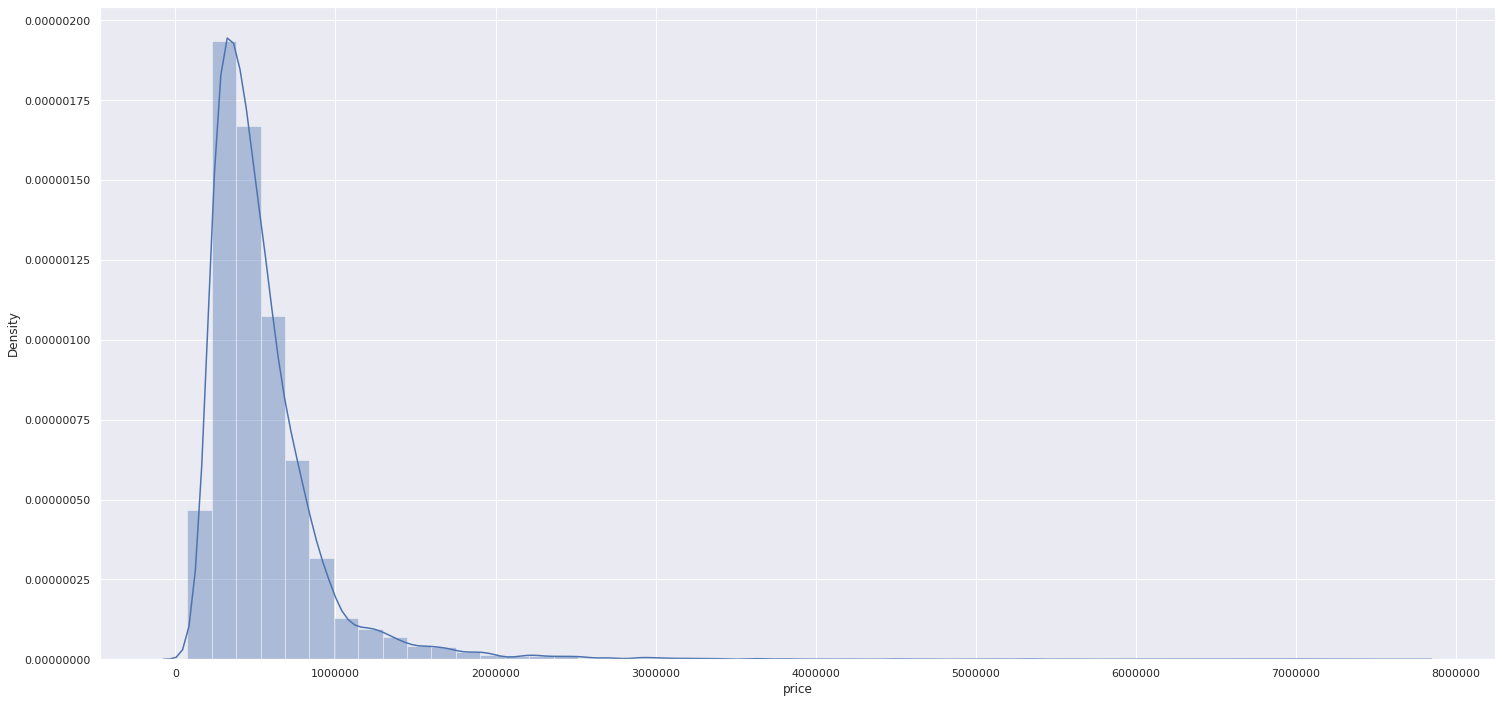

In [22]:
sns.distplot( df3['price'] );
plt.ticklabel_format( style='plain', axis='both' )

### 3.1.2 Numerical Variable 

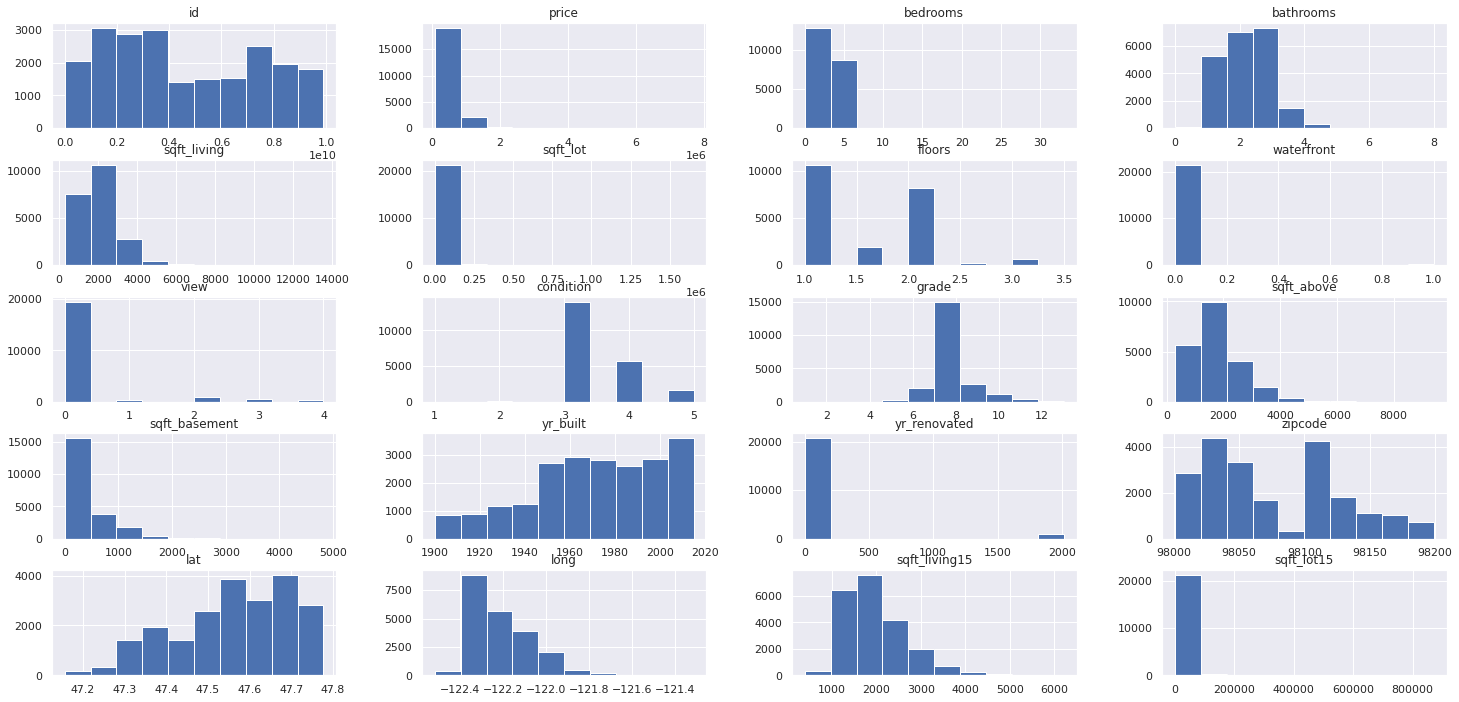

In [23]:
num_attributes.hist()
plt.show()

## 3.2. Analise Bivariada

### H1. Casas construídas nos ultimos 20 anos possuem mais andares.
**Verdadeiro** Casas construídas nas últimas 2 décadas, em média, tiveram um aumento no número de andares.

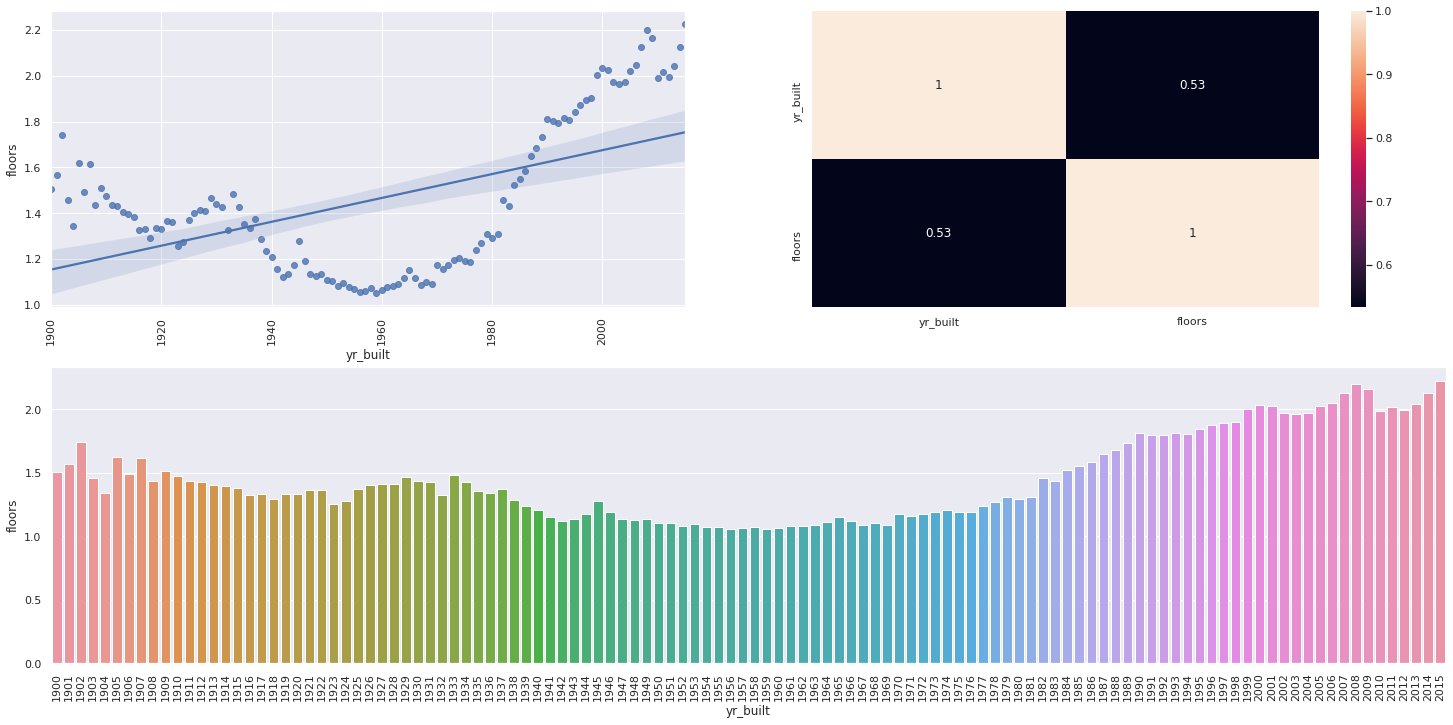

In [24]:
aux1 = df3[['floors', 'yr_built']].groupby( 'yr_built' ).mean().reset_index()
#bins = list( np.arange( 1900, 2015, 5 ) )
#aux1['yr_built_binned'] = pd.cut( aux1['yr_built'], bins=bins )
#aux2 = aux1[['yr_built_binned','floors']].groupby('yr_built_binned').mean().reset_index()

grid = GridSpec( 2, 2 )

plt.subplot( grid[1,:] )
sns.barplot( x='yr_built', y='floors', data=aux1 );
plt.xticks( rotation=90 );



plt.subplot( grid[0,0] )
sns.regplot( x='yr_built', y='floors', data=aux1 );
plt.xticks( rotation=90 );


plt.subplot( grid[0,1] )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );


### H2 .Casas com vista para a água são em média 300% mais caras.
**Verdadeiro** Casas com vista para aguá custam em média 300% a mais.

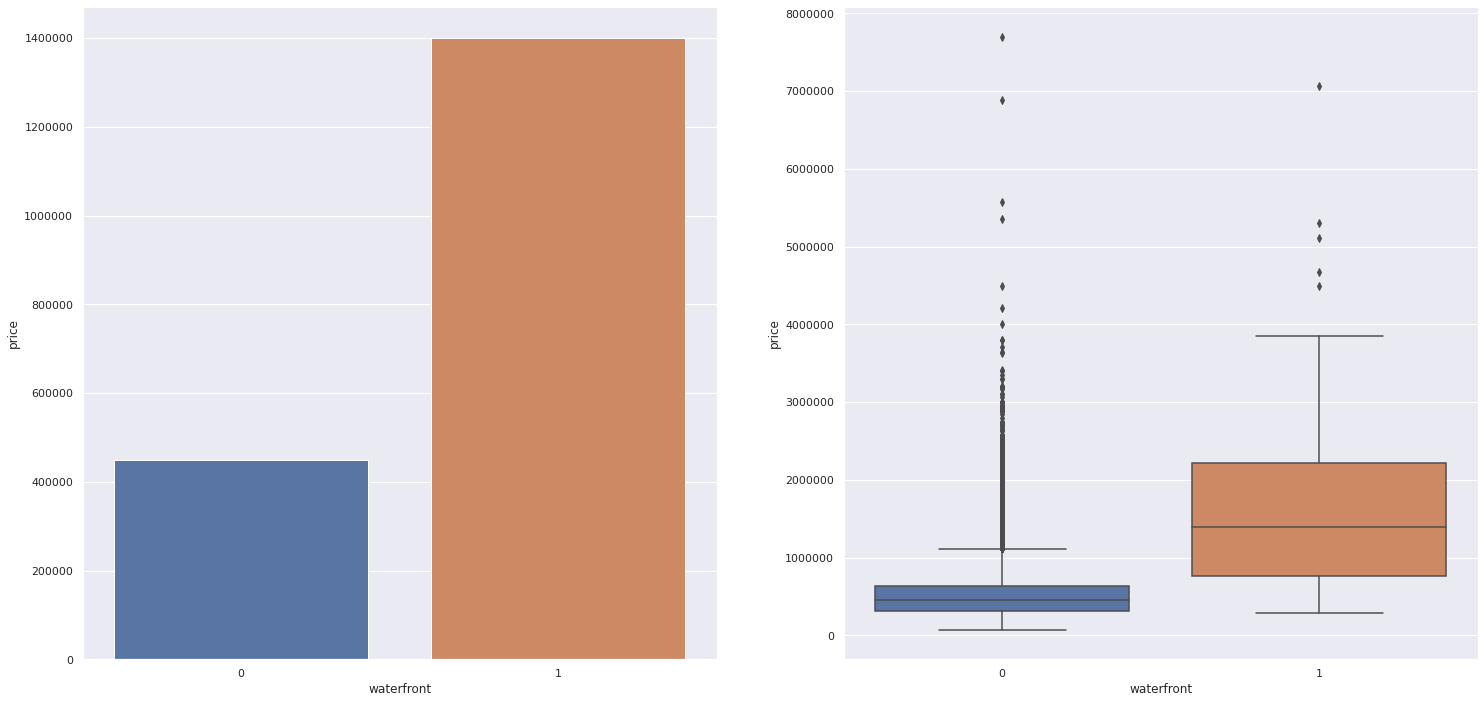

In [25]:
aux1 = df3[['price', 'waterfront']].groupby( 'waterfront' ).median().reset_index()

plt.subplot(1, 2, 1)
sns.barplot( x='waterfront', y='price', data=aux1);
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1, 2, 2)
sns.boxplot( x='waterfront', y='price', data=df3 );
plt.ticklabel_format(style='plain', axis='y')

In [26]:
houses = df2[['id', 'lat', 'long', 'price']]

fig = px.scatter_mapbox( houses,
                         lat = 'lat',
                         lon = 'long',
                         size = 'price',
                         color_continuous_scale = px.colors.cyclical.IceFire,
                         size_max=15,
                         zoom=10 )

fig.update_layout( mapbox_style = 'open-street-map' )
fig.update_layout( height=900, margin={ 'r': 0, 't': 0, 'l': 0, 'b': 0 } )
fig.show();

### H3. Casas com melhor vista deveriam ter o preço maior. Analisar melhor a hipotese

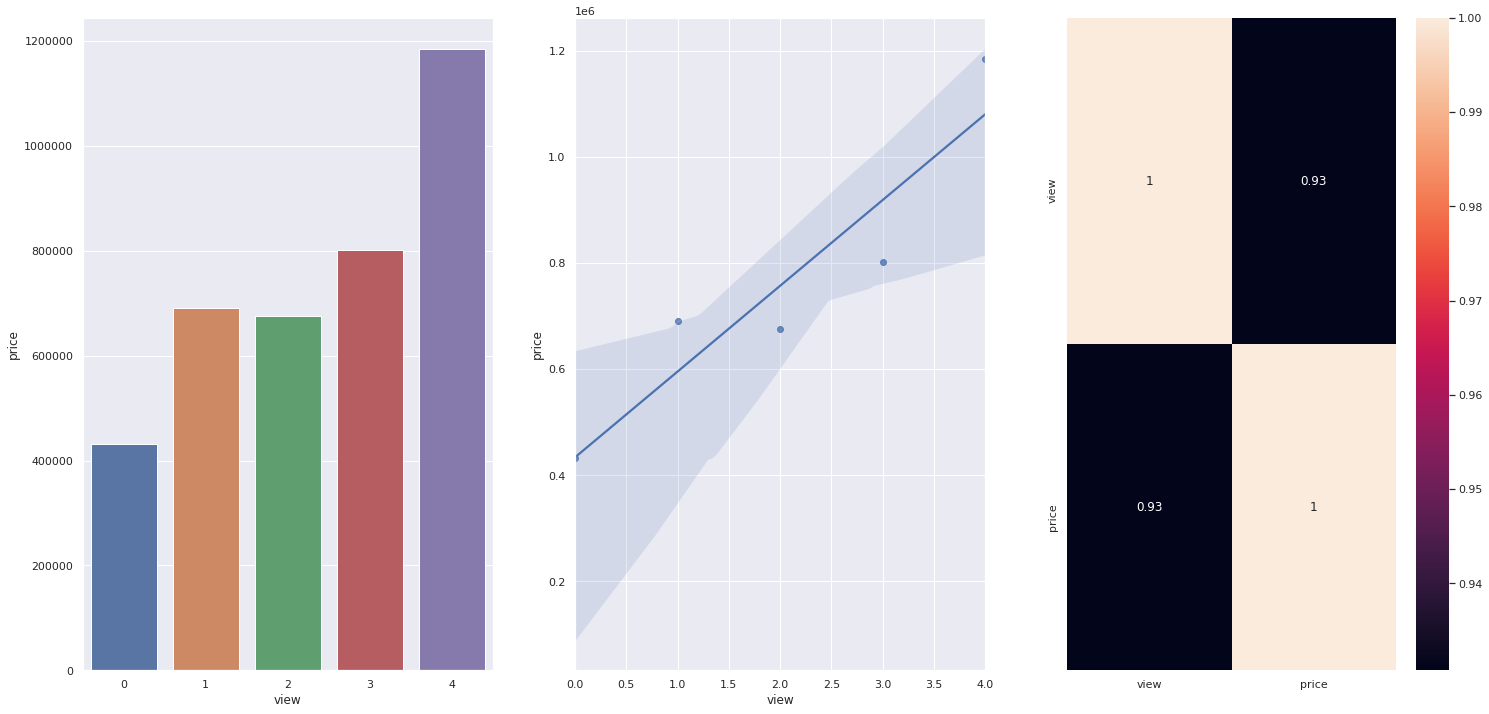

In [27]:
aux1 = df3[['price', 'view']].groupby( 'view' ).median().reset_index()


plt.subplot(1, 3, 1)
sns.barplot( x='view', y='price', data=aux1);
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1, 3, 2)
sns.regplot( x='view', y='price', data=aux1 )

plt.subplot(1, 3, 3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### H5. Casas  em melhores condiçoes são em média 50% mais caras. Analisar melhor

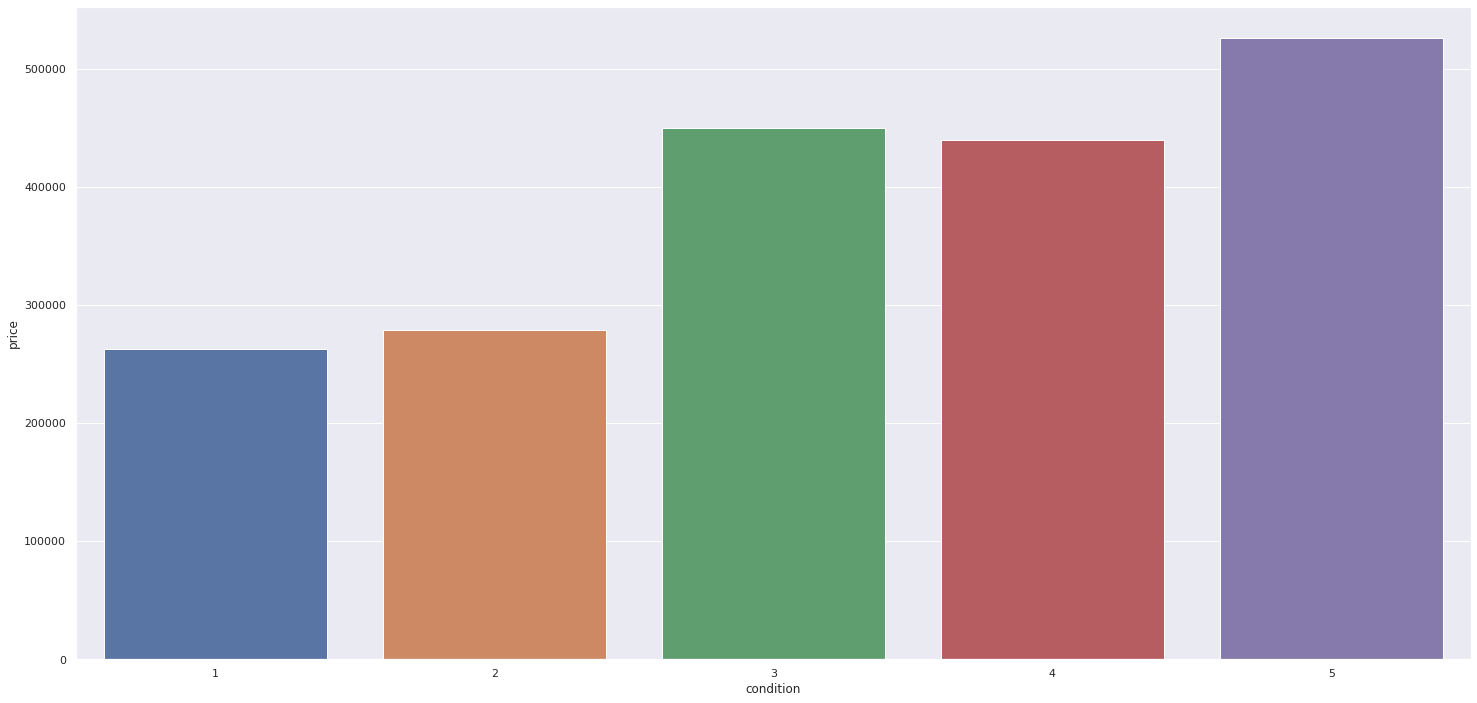

In [28]:
aux1 = df3[['price', 'condition']].groupby( 'condition' ).median().reset_index()
sns.barplot( x='condition', y='price', data=aux1);
plt.ticklabel_format( style='plain', axis='y');

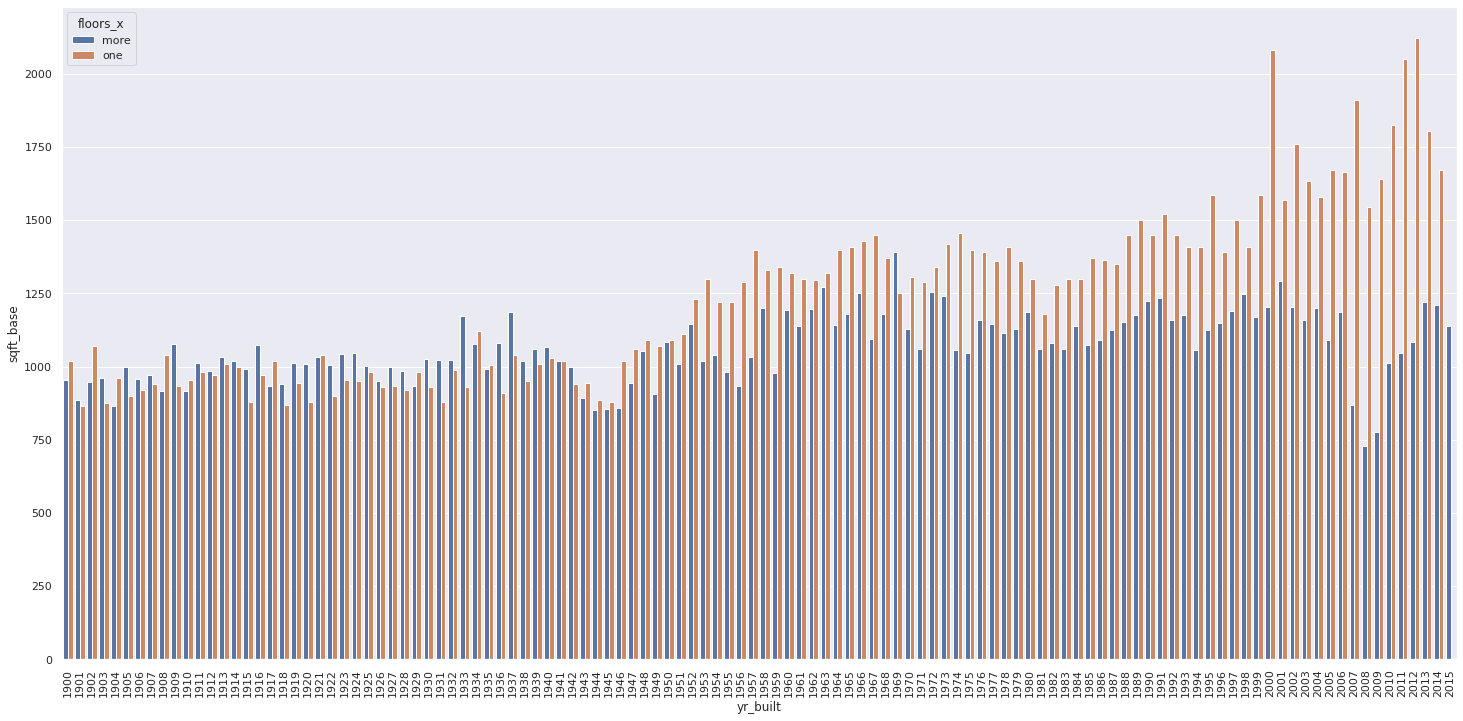

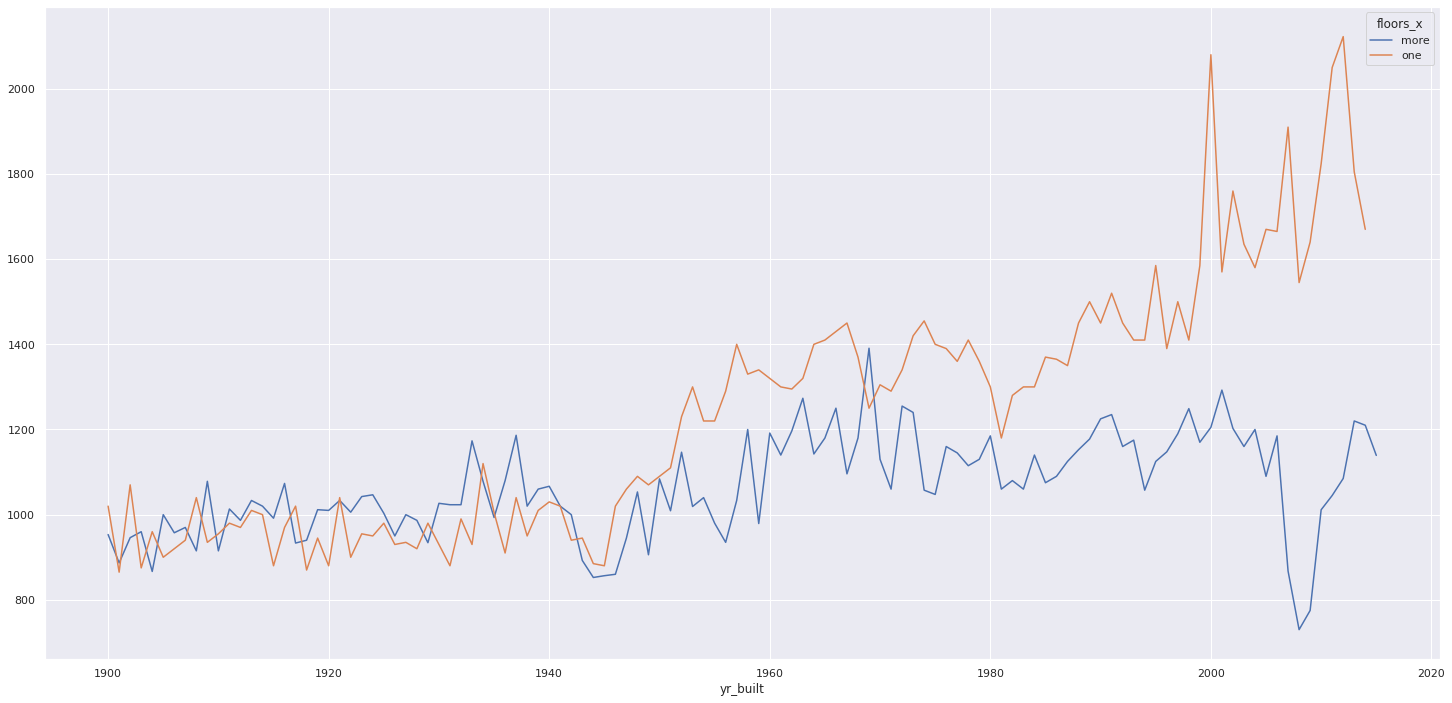

In [29]:
aux1 = df3[['sqft_base','floors_x', 'yr_built']].groupby( ['floors_x', 'yr_built'] ).median().reset_index() # or living

sns.barplot(x='yr_built', y='sqft_base', hue='floors_x', data=aux1)
plt.xticks( rotation=90);
plt.ticklabel_format(style='plain', axis='y');


aux1.pivot( index='yr_built', columns='floors_x', values='sqft_base' ).plot();

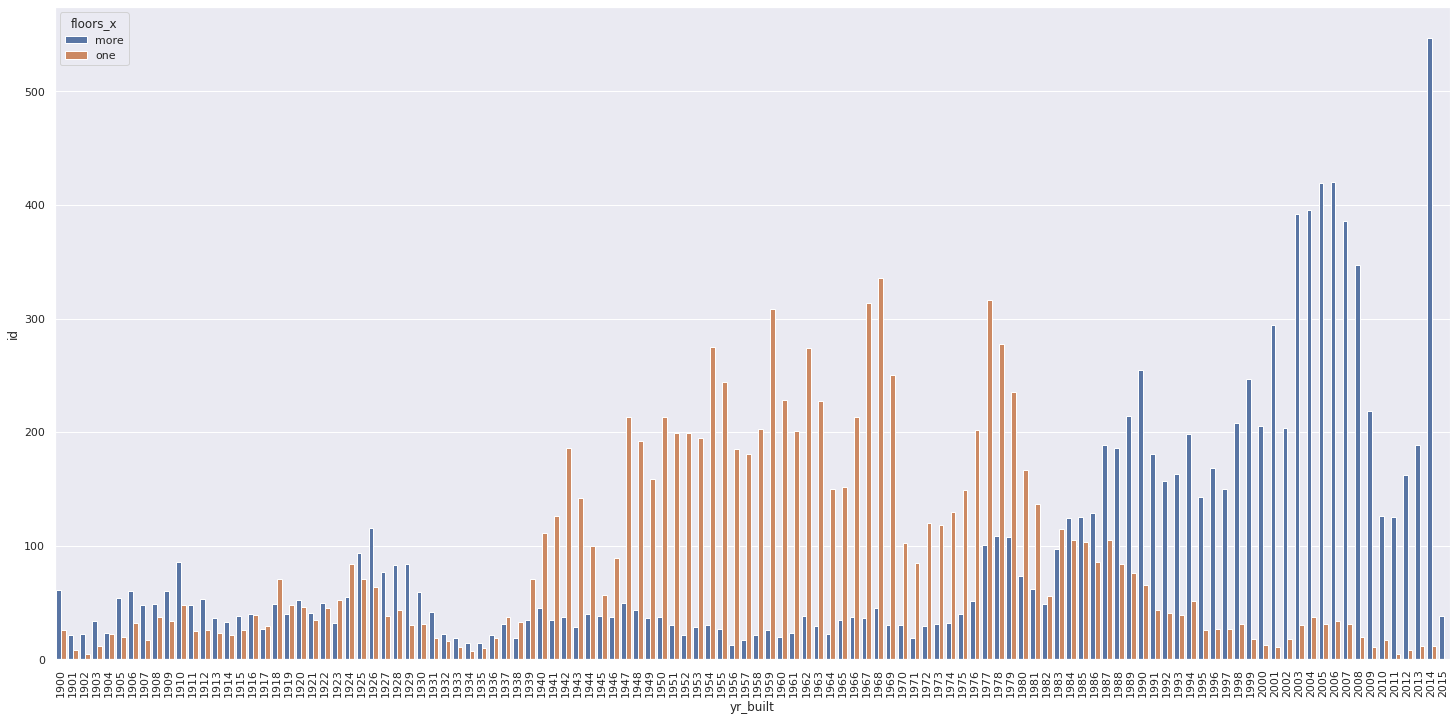

In [30]:
aux2 = df3[['id', 'floors_x', 'yr_built']].groupby( ['floors_x','yr_built'] ).count().reset_index()

sns.barplot( x='yr_built', y='id', hue='floors_x', data=aux2);
plt.xticks( rotation=90);
plt.ticklabel_format(style='plain', axis='y');

### Insight??? Area da casa em relação ao terreno aumentou

In [31]:
df3['living_lot'] =  ( df3['sqft_base'] / df3['sqft_lot'] ) * 100 

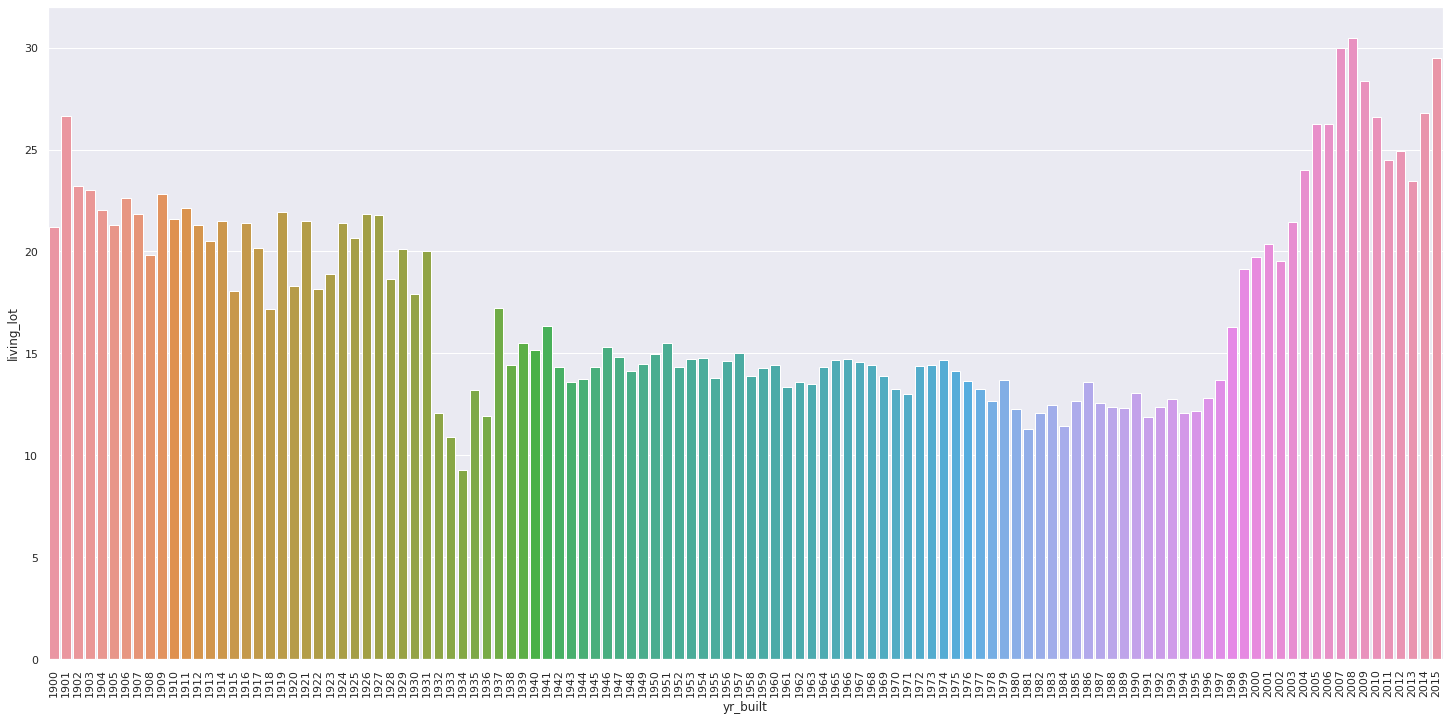

In [32]:
aux3 = df3[['living_lot','yr_built']].groupby('yr_built').median().reset_index()

sns.barplot( x= 'yr_built', y='living_lot', data = aux3 )
plt.xticks( rotation=90);

### H7. Casas que possuem porão são em média 20% mais caras. 

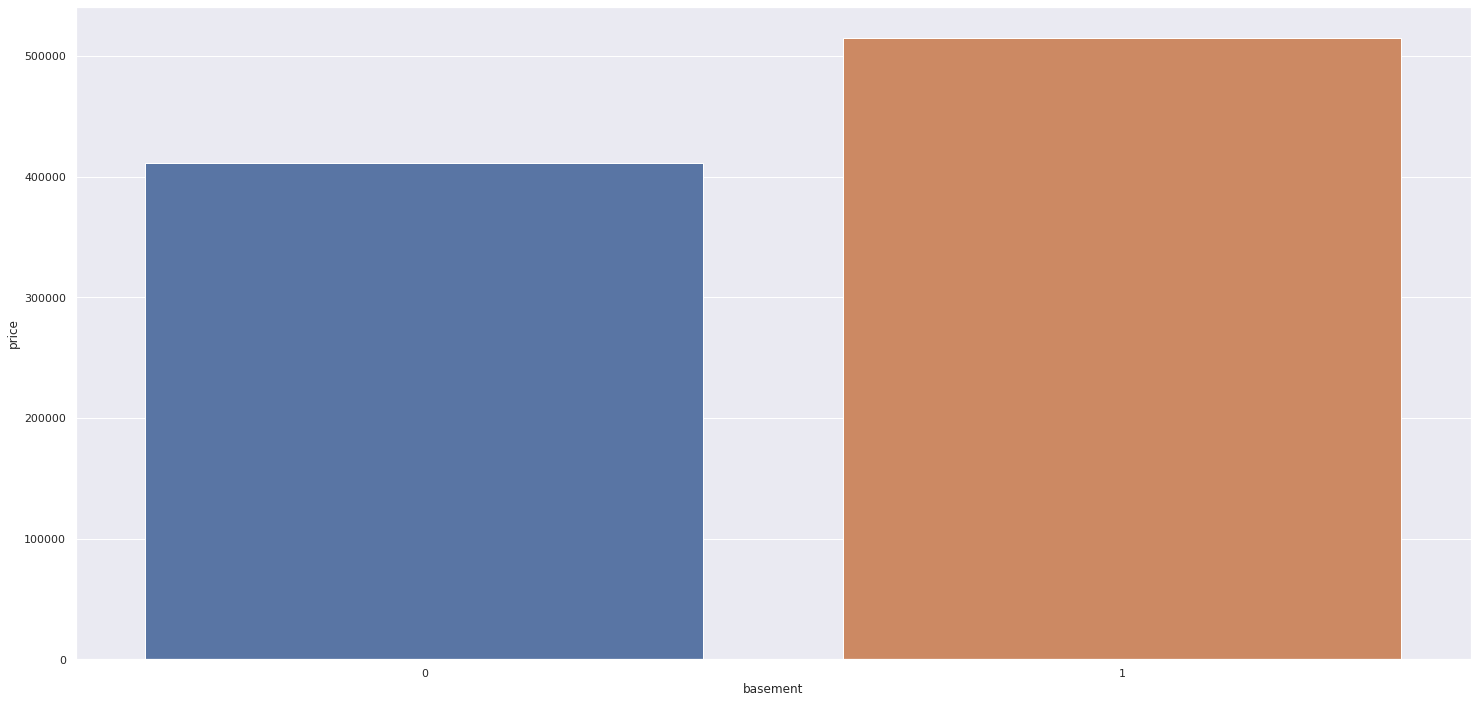

In [33]:
aux1 = df3[['price','basement']].groupby( 'basement' ).median().reset_index()
sns.barplot( x='basement', y='price', data=aux1 );


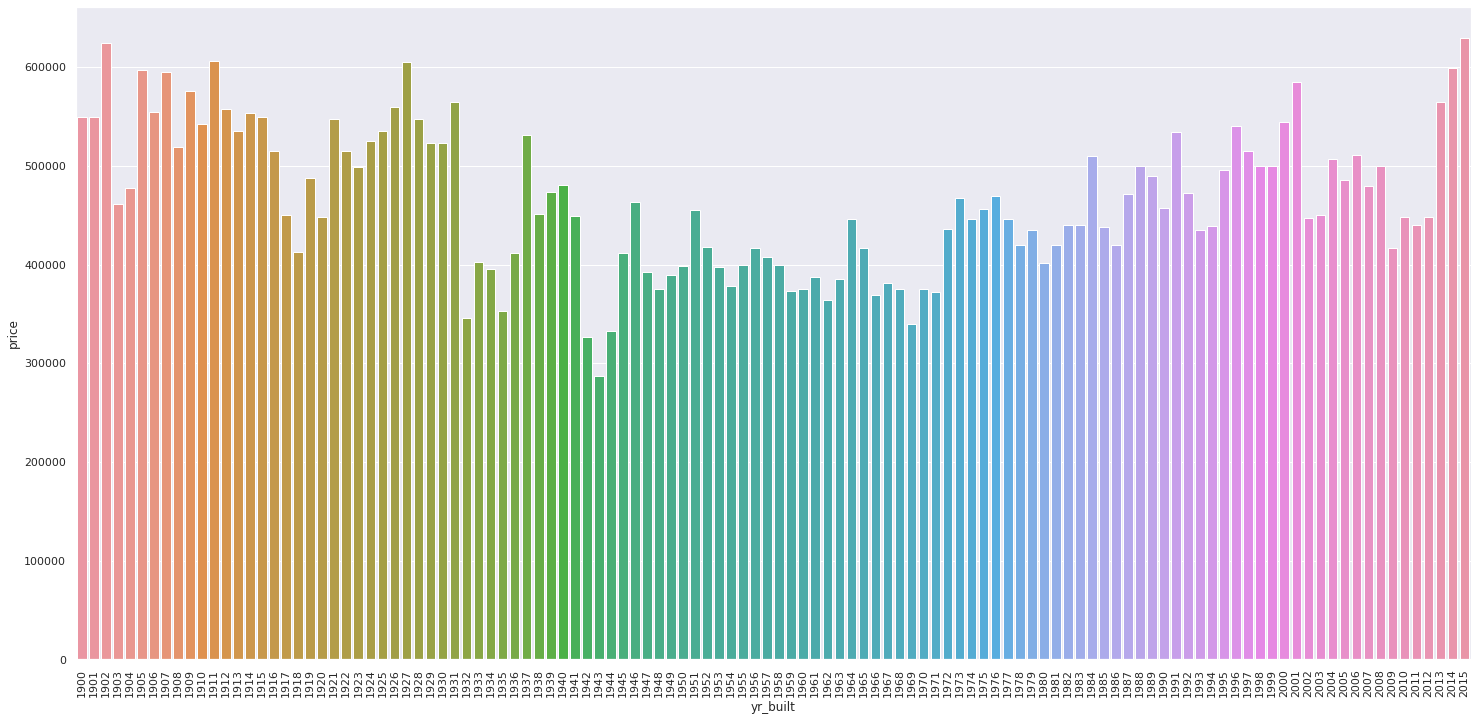

In [34]:
aux1 = df3[['price', 'yr_built']].groupby( 'yr_built' ).median().reset_index()

sns.barplot( x='yr_built', y='price', data=aux1 );
plt.xticks( rotation=90 );

### H9. Casas reformadas custam em média 30% a mais.

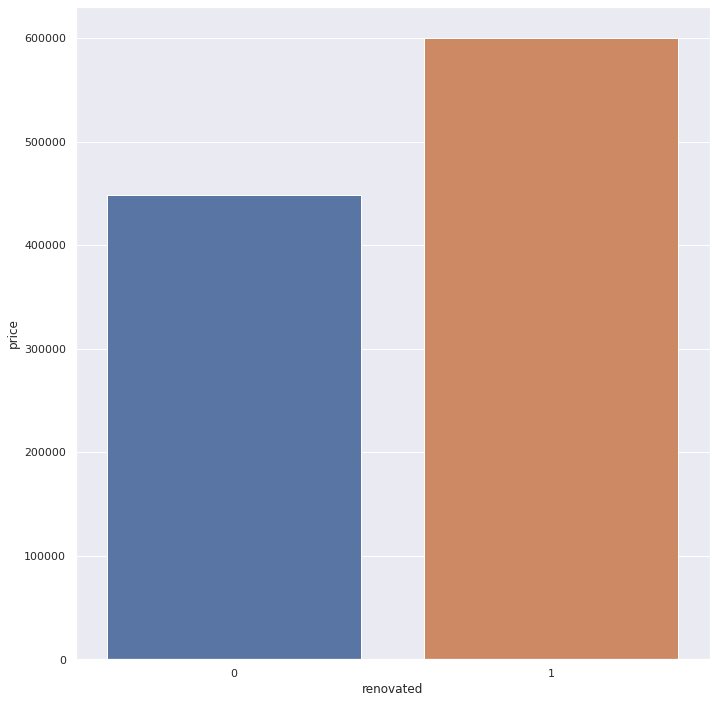

In [35]:
aux1 = df3[['price', 'renovated']].groupby( 'renovated' ).median().reset_index()

plt.subplot(1, 2, 1)
sns.barplot( x='renovated', y='price', data=aux1);
plt.ticklabel_format( style='plain', axis='y' )

### H10. A relação de área entre casas e seus vizinhos deveriam ser diretamente proporcionais.

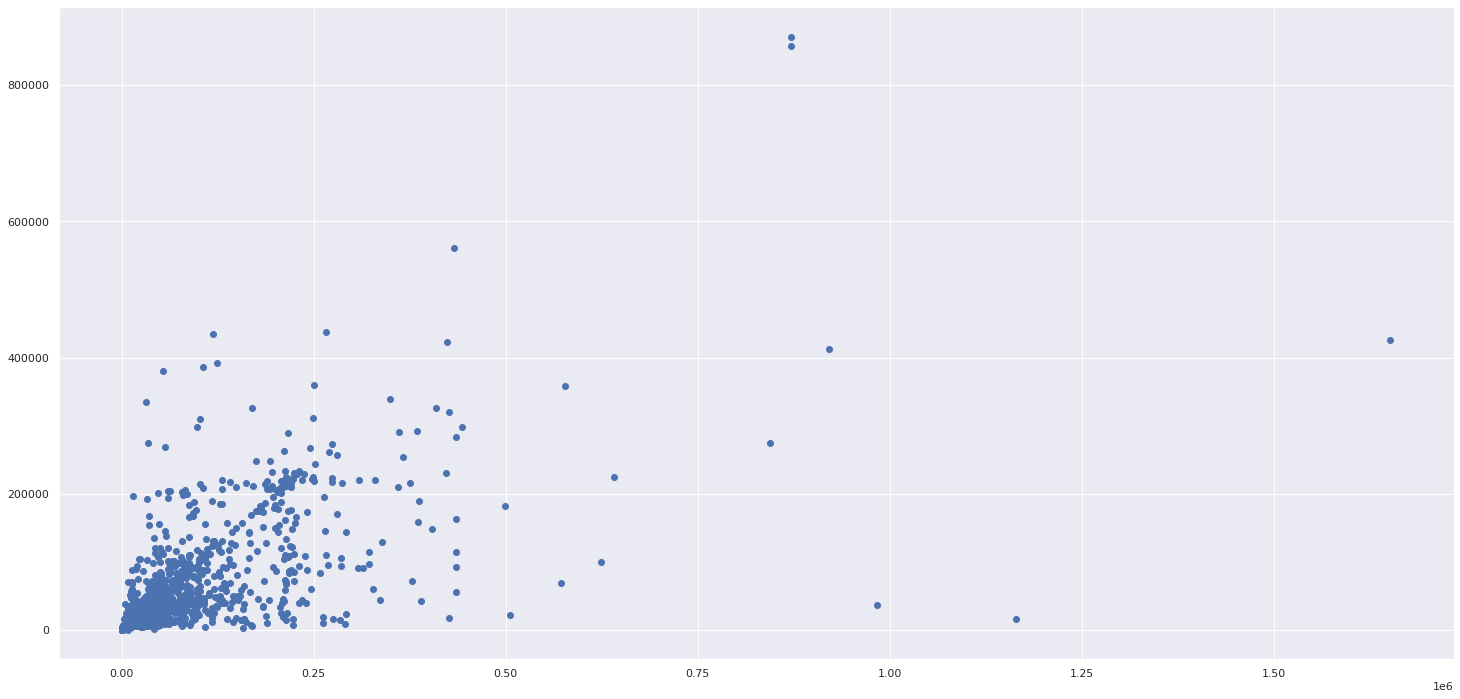

In [36]:
aux1 = df3[['sqft_lot','sqft_lot15']].groupby( 'sqft_lot15' ).median().reset_index()

#plt.subplot( 1, 2, 1 )
plt.scatter(x='sqft_lot' , y='sqft_lot15', data=aux1);
plt.ticklabel_format( style='plain', axis='y' )


#plt.subplot( 1, 2, 2 )
#bins = list( np.arange(500, 600500, 20000 ) )
#aux1['sqft_lot_binned'] = pd.cut( aux1['sqft_lot'], bins=bins )
#aux2 = aux1[['sqft_lot_binned','sqft_lot15']].groupby( 'sqft_lot_binned' )
#sns.barplot( x='sqft_lot_binned', y='sqft_lot15', data=aux2 );
#plt.xticks( rotation=90);
#sns.barplot(x='sqft_lot' , y='sqft_lot15', data=aux1);
#plt.ticklabel_format( style='plain', axis='y' )

### H11. Casas Contruidas nos ultimos 20 anos tem qualidade superior.

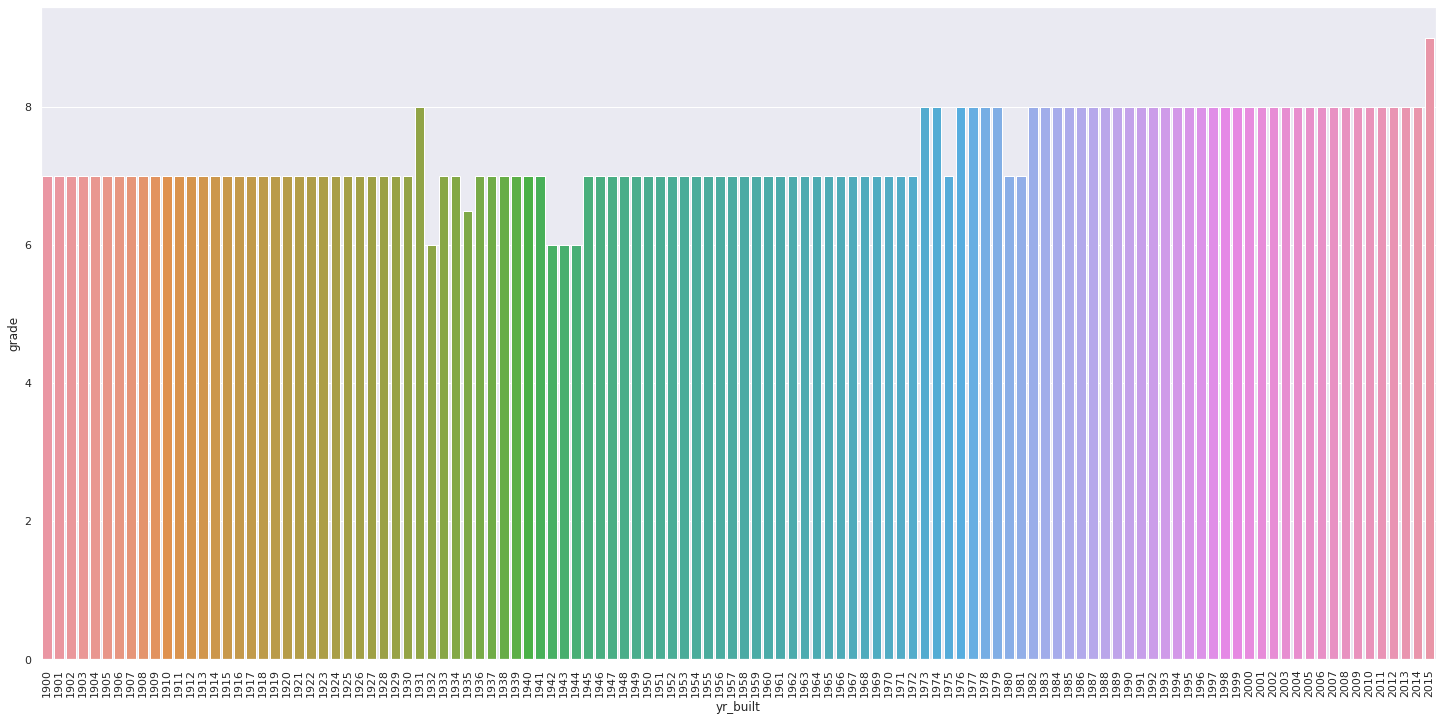

In [37]:
aux1 = df3[['grade','yr_built']].groupby('yr_built').median().reset_index()

sns.barplot( x='yr_built', y='grade', data=aux1 );
plt.xticks( rotation=90 );
plt.ticklabel_format( style='plain', axis='y' )

### H12. Deveriam ser vendidas mais casas em estações de clima quente.

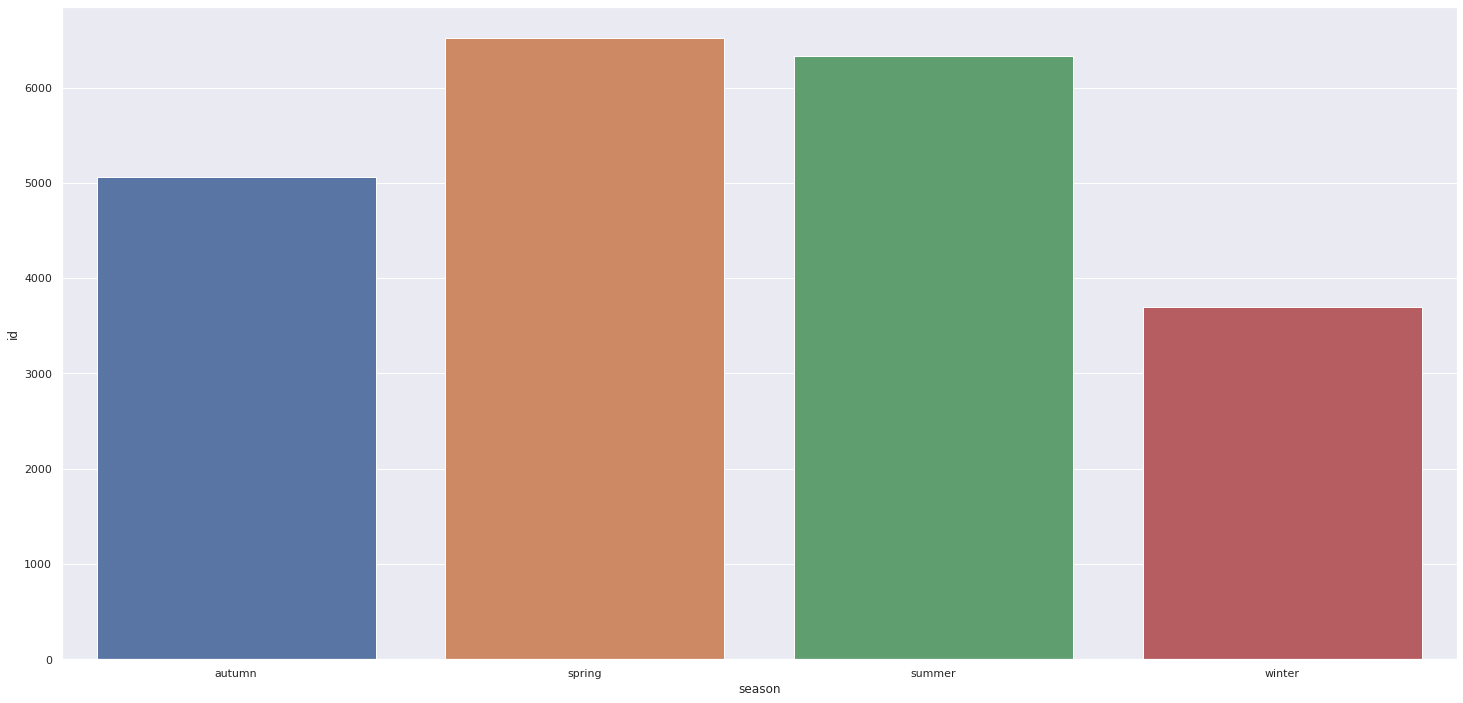

In [38]:
aux1 = df3[['id', 'season']].groupby('season').count().reset_index()

sns.barplot(x='season', y= 'id', data=aux1);


### H13. Deveriam ser vendidas mais casas na segunda metade do mês.

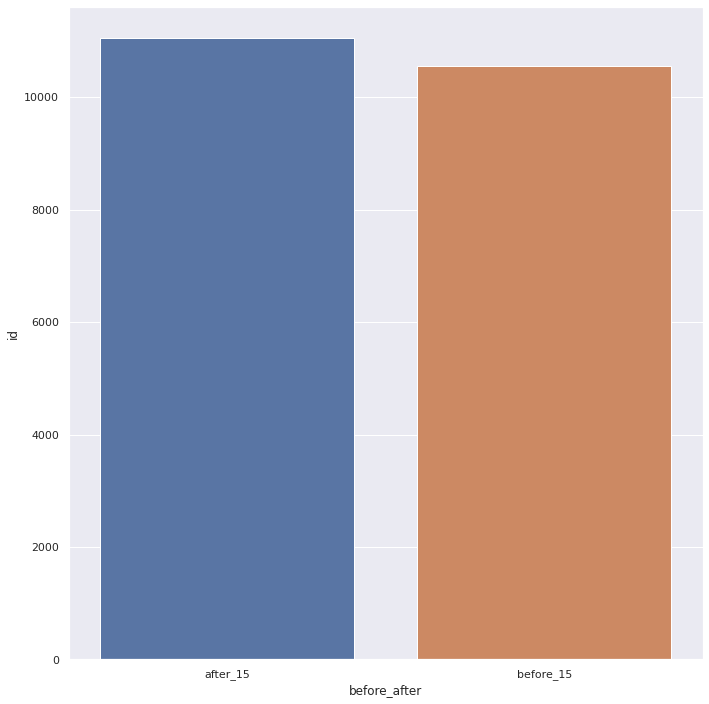

In [39]:

plt.subplot( 1, 2, 1)
aux1 = df3[['before_after', 'id']].groupby( 'before_after' ).count().reset_index()
sns.barplot( x='before_after', y='id', data=aux1);

### H16. Na primavera as casas 

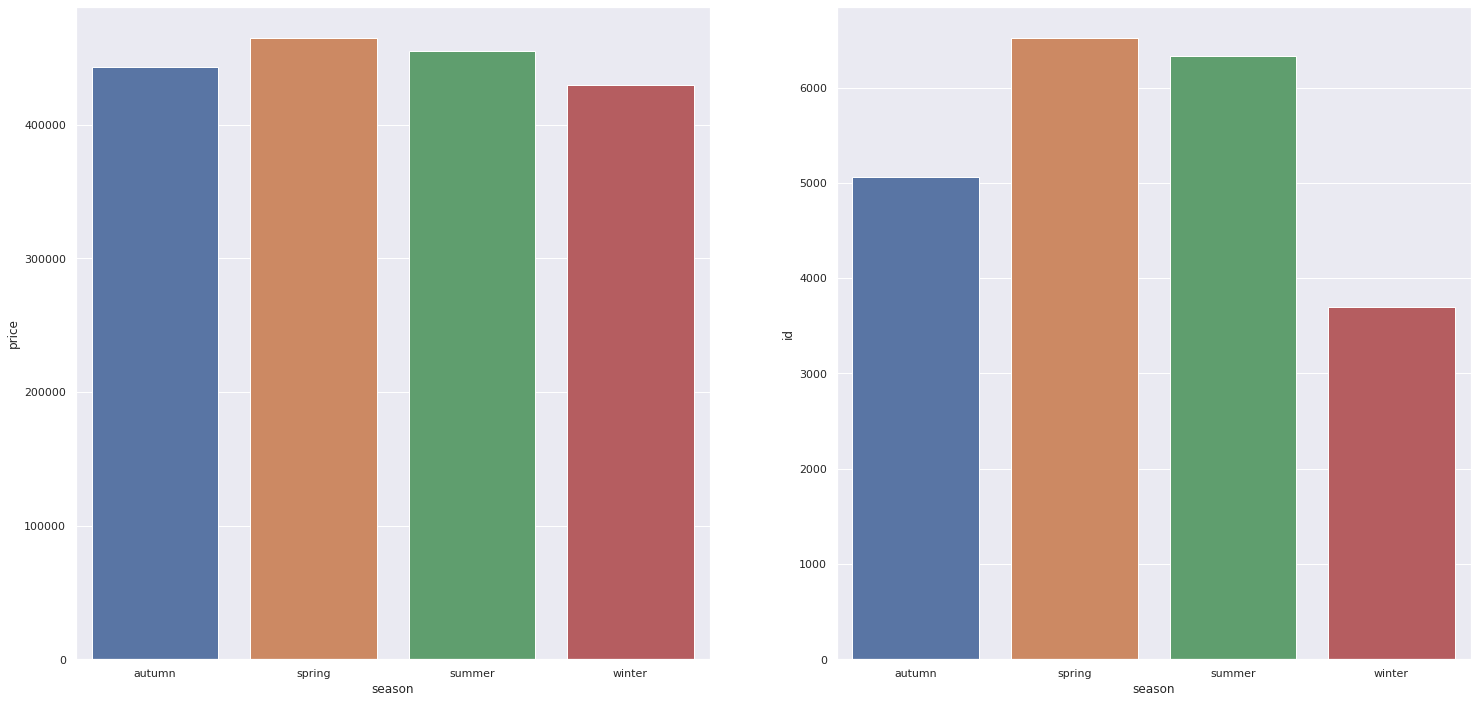

In [40]:
aux1 = df3[['price', 'season']].groupby('season').median().reset_index()

plt.subplot( 1, 2, 1)
sns.barplot( x='season', y='price', data=aux1);
plt.ticklabel_format( style='plain', axis='y')

plt.subplot( 1, 2, 2)
aux2 = df3[['id', 'season']].groupby('season').count().reset_index()
sns.barplot( x='season', y='id', data=aux2 );
plt.ticklabel_format( style='plain', axis='y')


In [41]:
aux1.head().sort_values('price', ascending=False)

season   price
1  spring  465000
2  summer  455000
0  autumn  443000
3  winter  430000

### H17. Casas recentes deveriam estar em melhores condições.

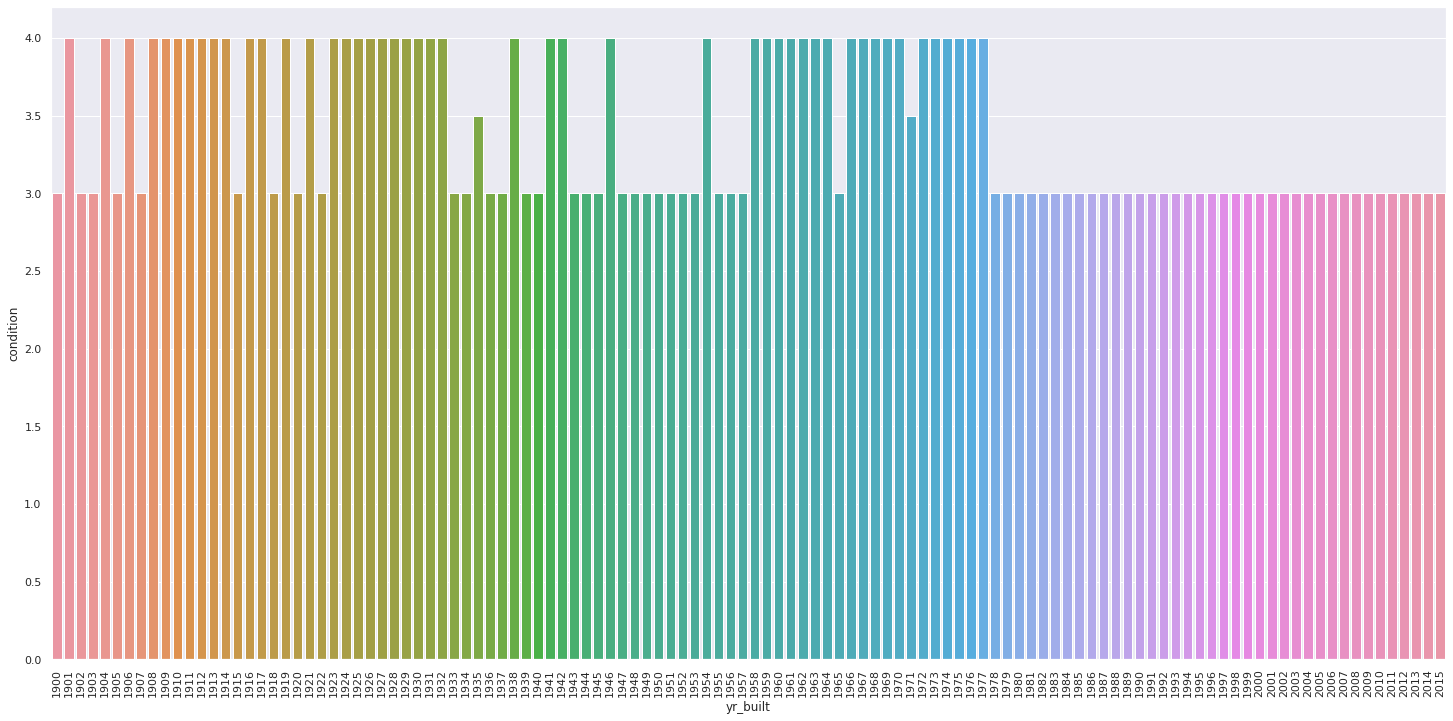

In [42]:
aux1 = df3[['condition','yr_built']].groupby('yr_built').median().reset_index()

sns.barplot( x='yr_built', y='condition', data=aux1 );
plt.xticks( rotation=90 );
plt.ticklabel_format( style='plain', axis='y' )

## 3.2. Analise Multivariada

### Correlagrama

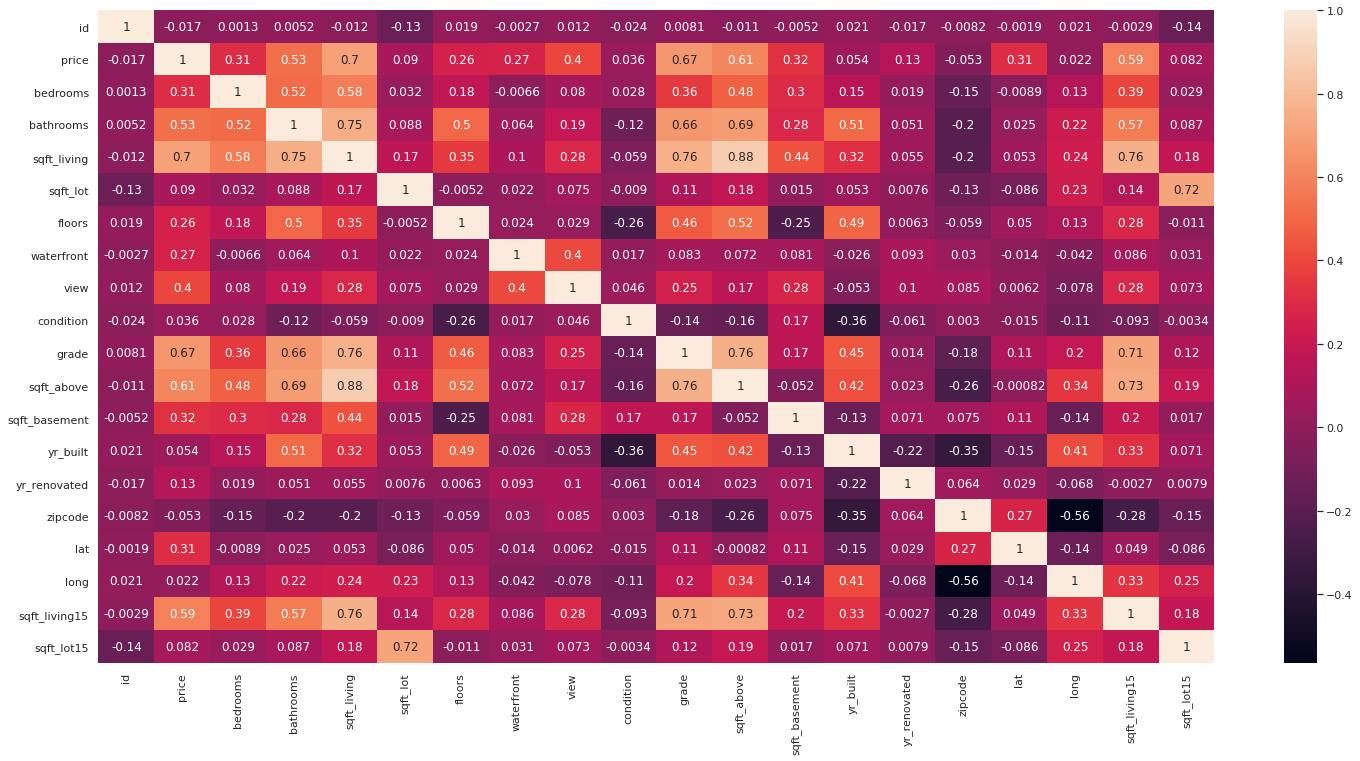

In [43]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True);

### H6. Casas mais recentes aproveitam mais o espaço vertical. Analisar melhor

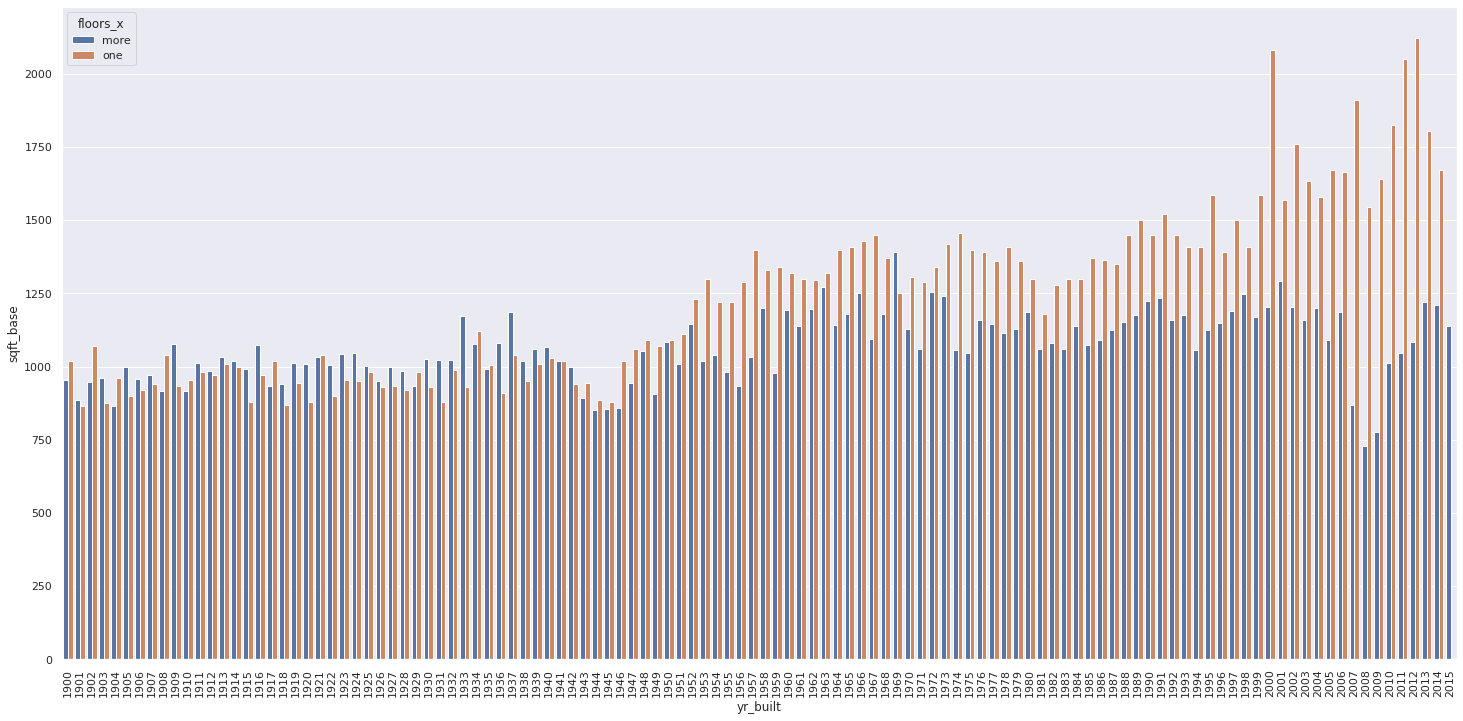

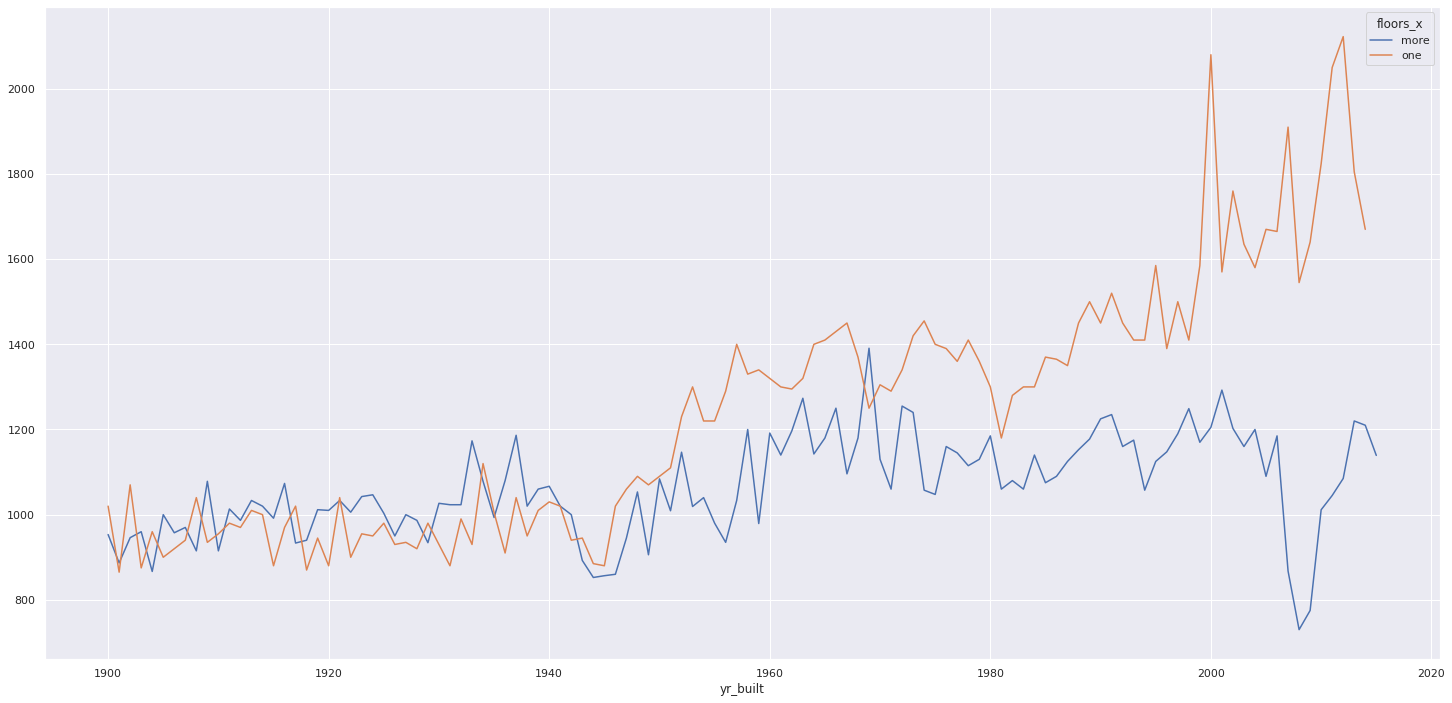

In [44]:
aux1 = df3[['sqft_base','floors_x', 'yr_built']].groupby( ['floors_x', 'yr_built'] ).median().reset_index() # or living

sns.barplot(x='yr_built', y='sqft_base', hue='floors_x', data=aux1)
plt.xticks( rotation=90);
plt.ticklabel_format(style='plain', axis='y');


aux1.pivot( index='yr_built', columns='floors_x', values='sqft_base' ).plot();

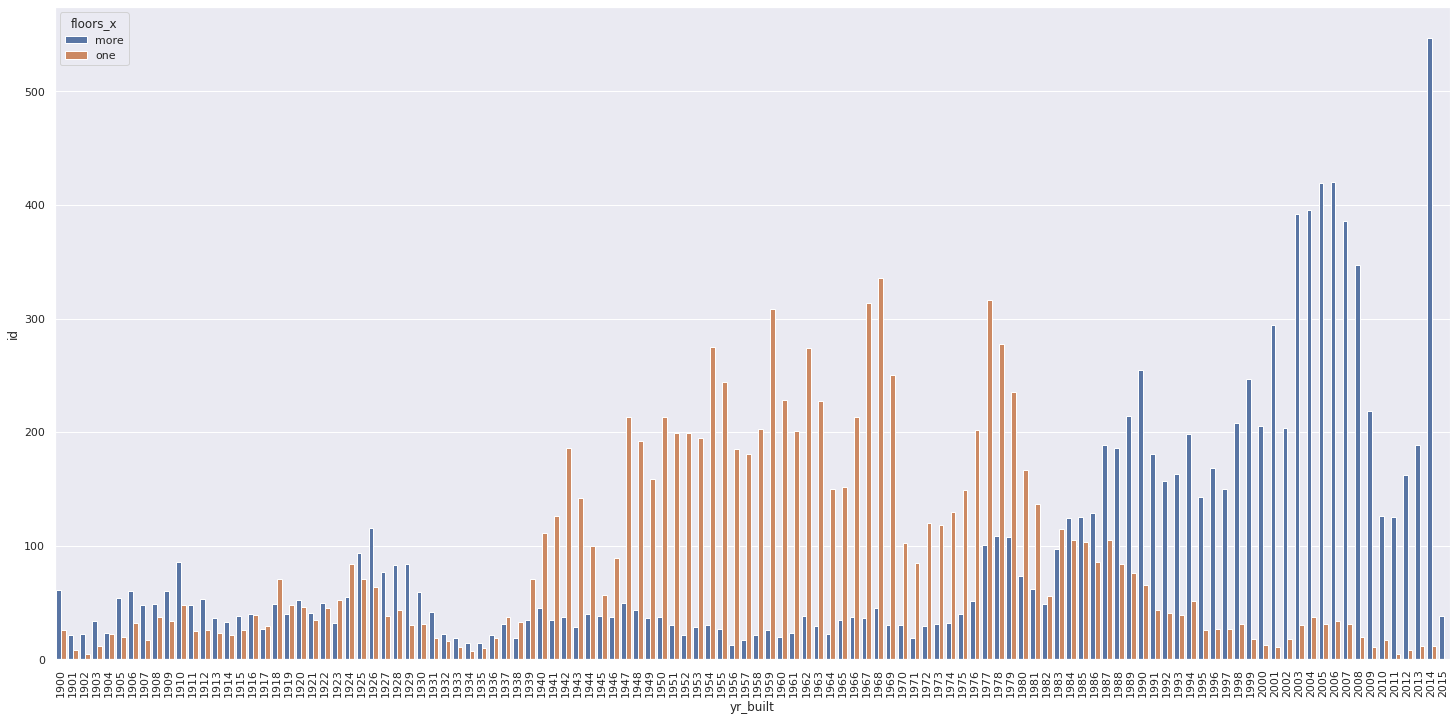

In [45]:
aux2 = df3[['id', 'floors_x', 'yr_built']].groupby( ['floors_x','yr_built'] ).count().reset_index()

sns.barplot( x='yr_built', y='id', hue='floors_x', data=aux2);
plt.xticks( rotation=90);
plt.ticklabel_format(style='plain', axis='y');

### H14. Com o passar dos anos as casas deixaram de ter porão.

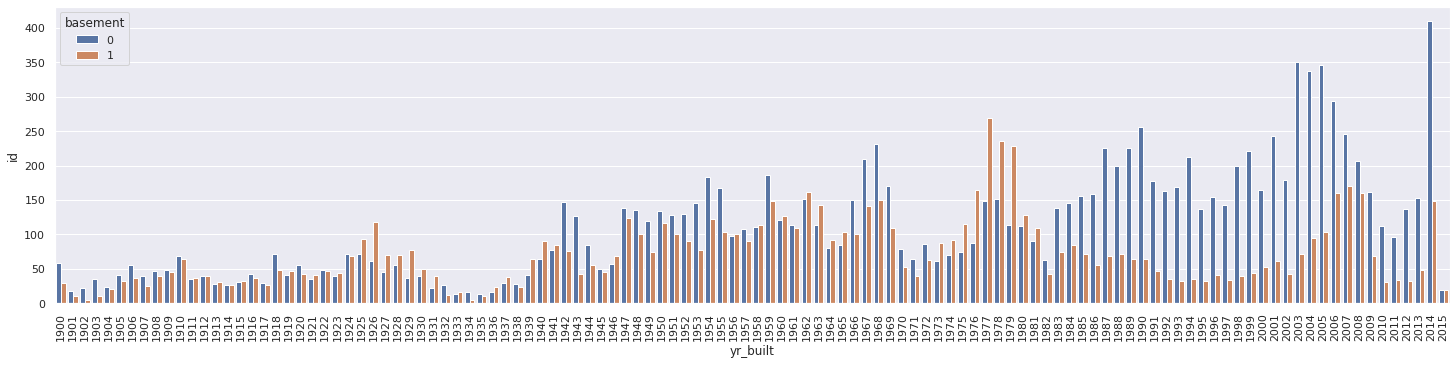

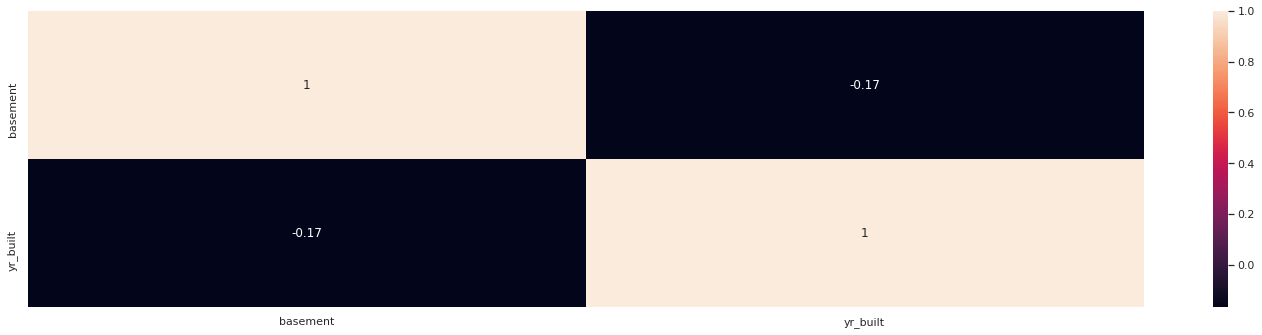

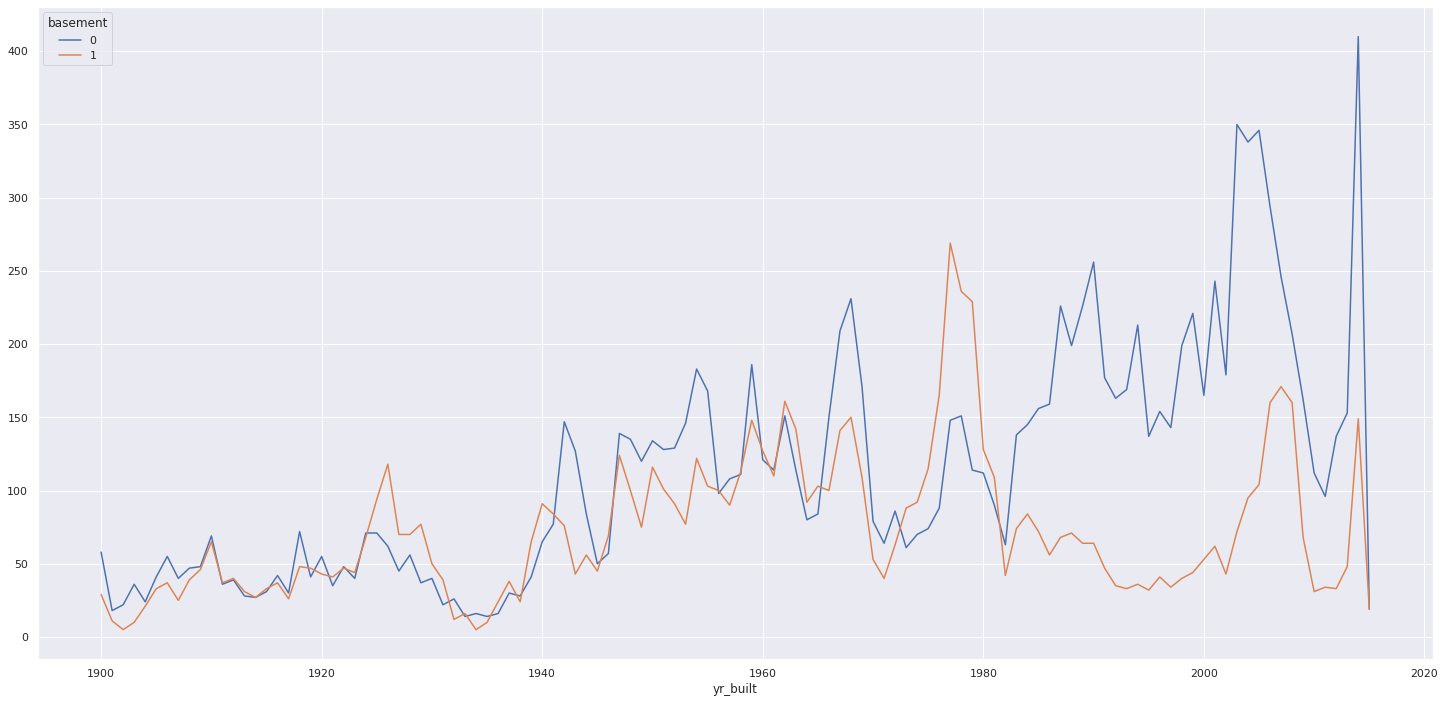

In [46]:
aux1 = df3[['id','basement', 'yr_built']].groupby( ['basement', 'yr_built'] ).count().reset_index()

plt.subplot(2, 1, 1)
sns.barplot( x='yr_built', y='id', hue='basement', data = aux1 );
plt.xticks( rotation=90 );
plt.show()

plt.subplot(2, 1, 2)
aux2 = df3[['basement', 'yr_built']]
sns.heatmap( aux2.corr( method='pearson' ), annot=True );

aux1.pivot( index='yr_built', columns='basement', values='id' ).plot();

### H15. Quanto agrega uma reforma

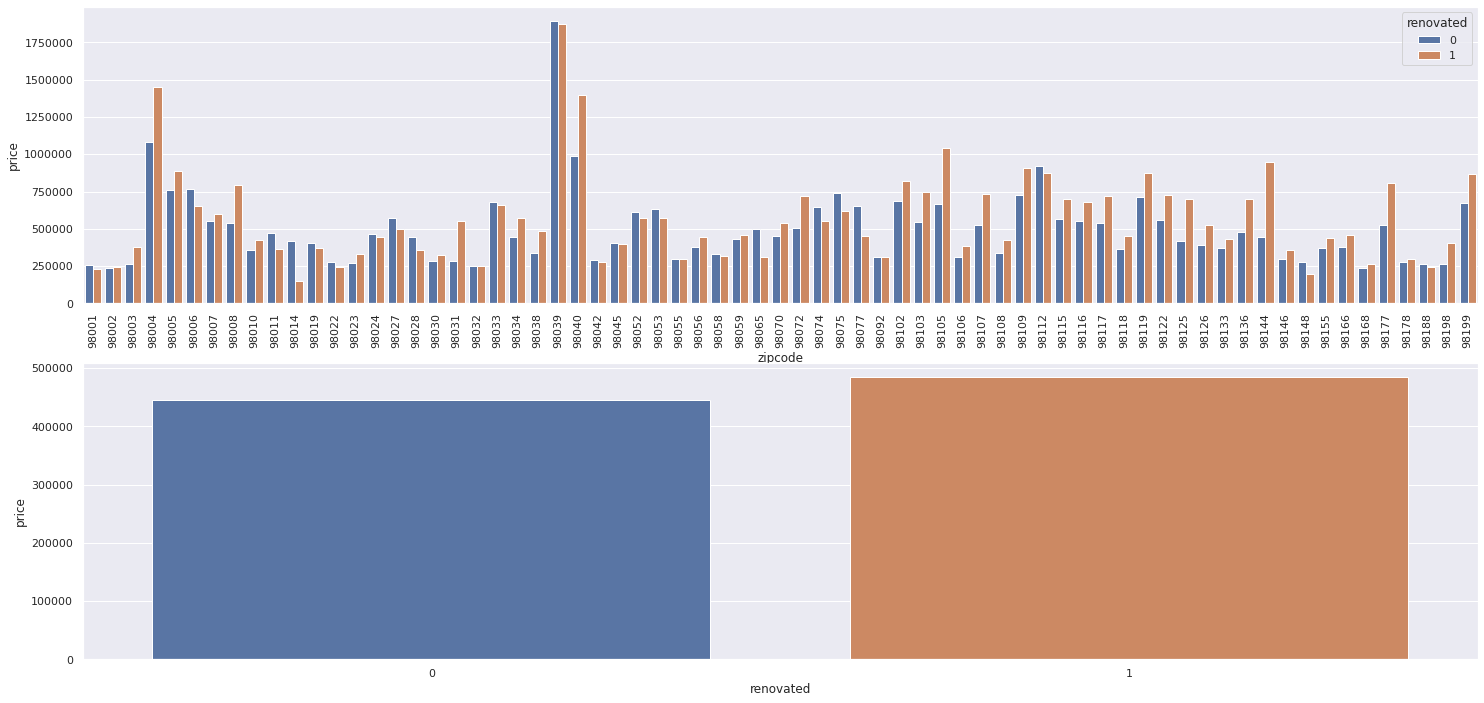

In [47]:
aux0 = df3[df3['zipcode'] !=98029]
aux1 = aux0[['price','zipcode','renovated']].groupby( ['zipcode', 'renovated'] ).median().reset_index()

plt.subplot(2 ,1, 1)
sns.barplot( x='zipcode', y='price', hue='renovated', data=aux1 )
plt.xticks( rotation=90 )
plt.ticklabel_format( style='plain', axis='y' )

plt.subplot(2 ,1, 2)
aux2 = aux1[['price', 'renovated']].groupby( 'renovated' ).median().reset_index()
sns.barplot( x='renovated', y='price', data=aux2 )
plt.ticklabel_format( style='plain', axis='y' )

In [48]:
print(f" Casas reformadas valem em média {( ( ( aux2['price'][1] / aux2['price'][0] ) - 1 ) * 100 ).round(2)} % a mais" )

 Casas reformadas valem em média 8.77 % a mais


# Outras coisas

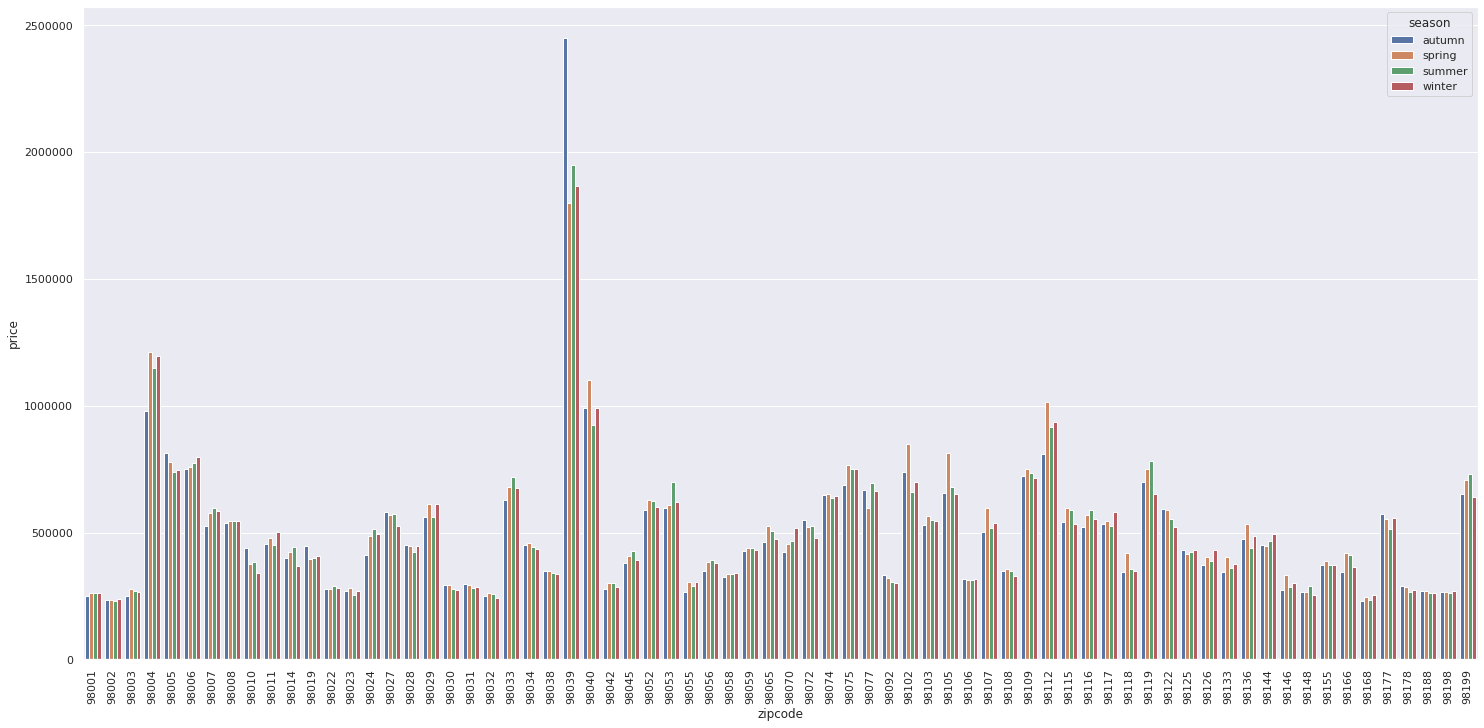

In [49]:
by_zip_season = df3[['price','zipcode', 'season']].groupby( ['zipcode', 'season'] ).median().reset_index()
sns.barplot( x='zipcode', y='price', hue='season', data=by_zip_season );
plt.xticks( rotation=90);
plt.ticklabel_format(style='plain', axis='y');

<AxesSubplot:xlabel='week_of_year'>

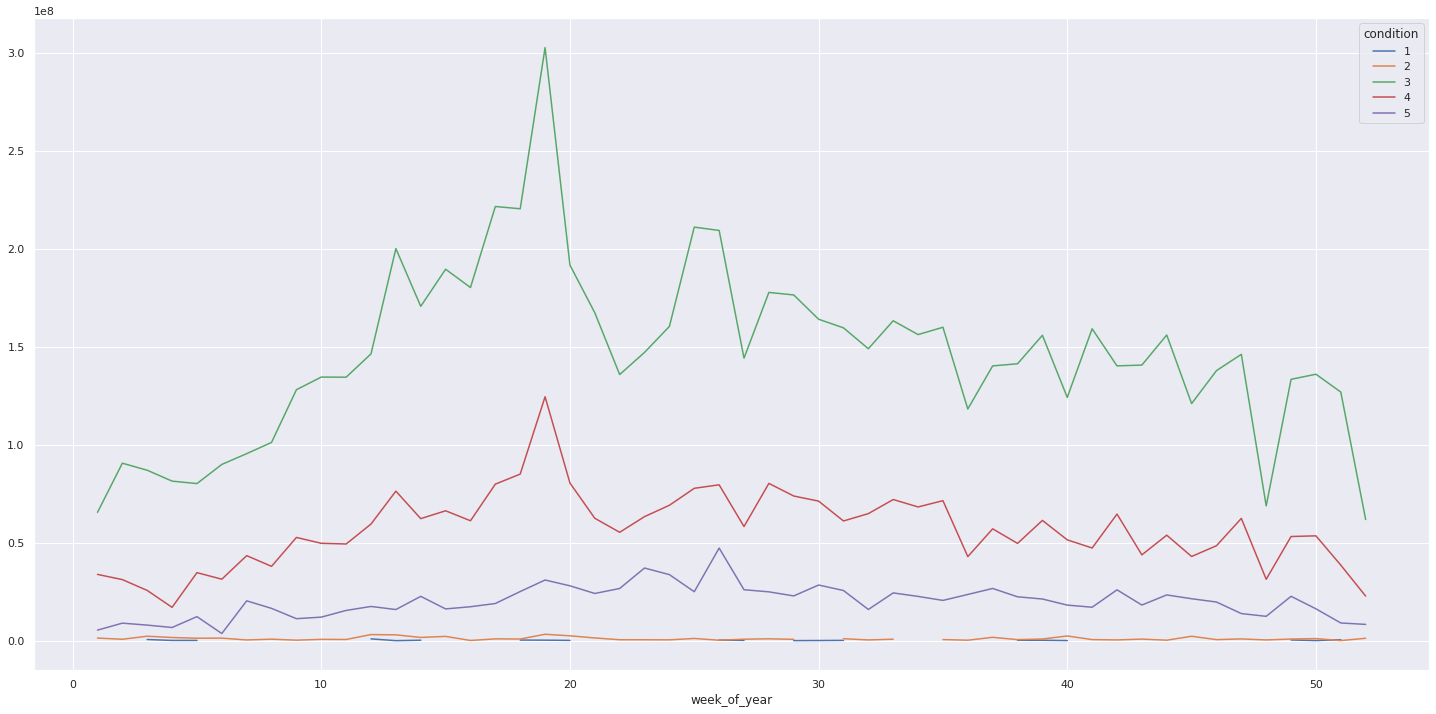

In [50]:
aux3 = df3[['week_of_year','condition','price']].groupby( ['week_of_year','condition']).sum().reset_index()
aux3.pivot( index='week_of_year', columns='condition', values='price' ).plot()

## 1 - Quais os imóveis que a empresa deveria comprar e por qual preço?

In [52]:
df4 = df3.copy()

In [53]:
# os imóveis que estão abaixo da mediana de preços por região e em boas condições

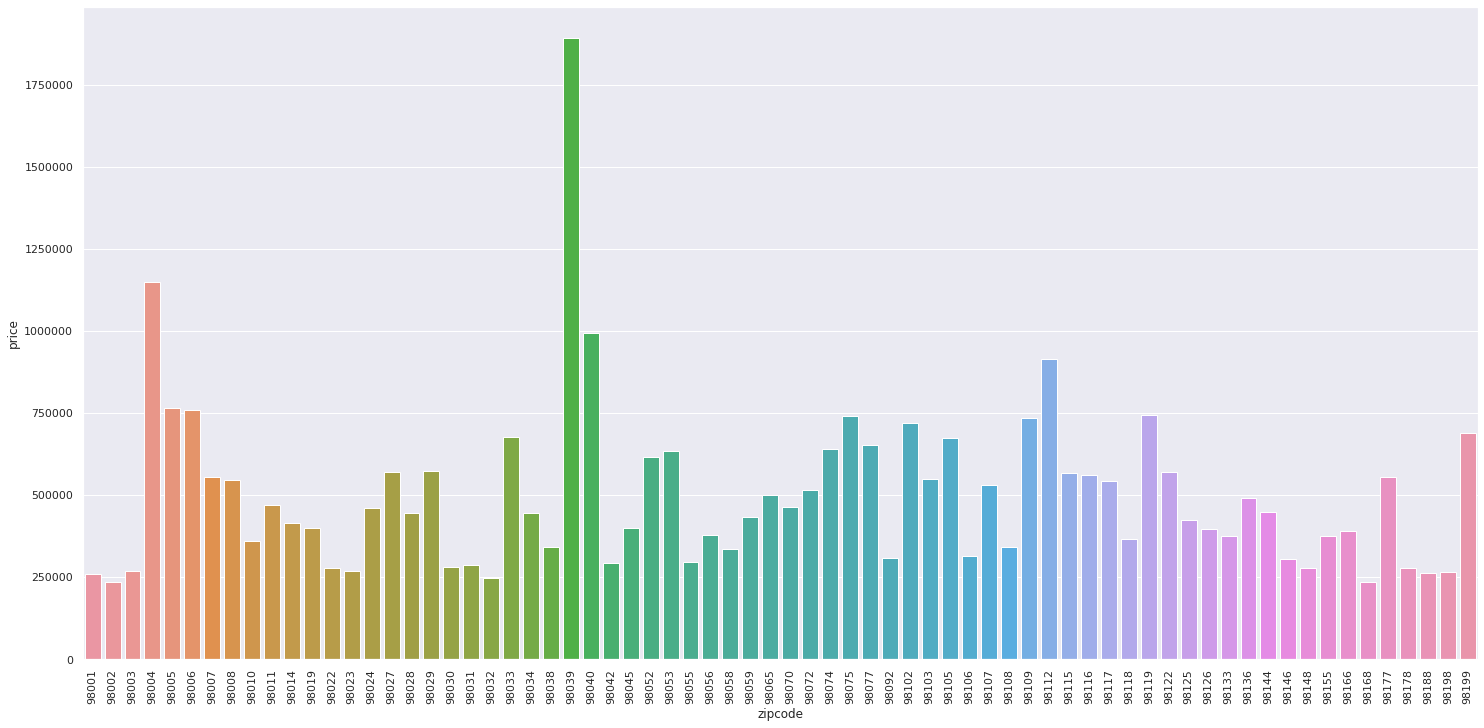

In [54]:
aux1 = df4[['price', 'zipcode']].groupby( 'zipcode' ).median().reset_index()
sns.barplot( x='zipcode', y='price', data = aux1 )
plt.ticklabel_format( style='plain', axis='y')
plt.xticks( rotation=90 );

In [55]:
aux1.rename(columns={'price': 'median_price'}, inplace=True)

In [56]:
aux2 = df4[['id', 'condition', 'grade', 'zipcode', 'season', 'price']]

In [57]:
purchase = pd.merge( aux2, aux1, how='left', on='zipcode' )

In [58]:
# purchase = purchase[( purchase['median_price'] - purchase['price'] > 0 ) & ( purchase['grade'] > 6 ) & (purchase['condition'] > 2 )]

In [59]:
purchase['valor'] = purchase['median_price'] - purchase['price']

In [60]:
purchase['compra'] = purchase.apply( lambda x: 'nao comprar' if x['valor'] < 0 else 'nao comprar' if x['condition'] < 3 else 'nao comprar' if x['grade'] < 7 else 'comprar', axis = 1)

In [61]:
aux3 = purchase[['id', 'compra']].groupby('compra').count().reset_index()
aux3[0:1]

compra    id
0  comprar  8811

## 2 - Após a aquisição, qual o melhor momento para vende-lo e por qual preço?

In [62]:
# deveriam ser compradas no inverno onde menos casas são vendidas e os preços são menores e deveriam ser vendidas na primavera onde existe maior demanda e os preços são maiores

In [63]:
purchase = purchase[purchase['compra'] == 'comprar']

In [64]:
purchase.head()

id  condition  grade  zipcode  season   price  median_price     valor   compra
0  7129300520          3      7    98178  autumn  221900     278277.00  56377.00  comprar
4  1954400510          3      8    98074  winter  510000     642000.00 132000.00  comprar
6  1321400060          3      7    98003  summer  257500     267475.00   9975.00  comprar
8  2414600126          3      7    98146  spring  229500     305000.00  75500.00  comprar
9  3793500160          3      7    98038  spring  323000     342000.00  19000.00  comprar

In [65]:
purchase['profit'] = purchase.apply( lambda x: ( x['price'] * 1.3 ) if x['season'] == 'spring' else ( x['price'] * 1.25 ) if x['season'] == 'summer' \
else ( x['price'] * 1.15 ) if x['season'] == 'autumn' else ( x['price'] * 1.1) , axis = 1 )

In [66]:
purchase.head()

id  condition  grade  zipcode  season   price  median_price     valor   compra    profit
0  7129300520          3      7    98178  autumn  221900     278277.00  56377.00  comprar 255185.00
4  1954400510          3      8    98074  winter  510000     642000.00 132000.00  comprar 561000.00
6  1321400060          3      7    98003  summer  257500     267475.00   9975.00  comprar 321875.00
8  2414600126          3      7    98146  spring  229500     305000.00  75500.00  comprar 298350.00
9  3793500160          3      7    98038  spring  323000     342000.00  19000.00  comprar 419900.00

In [67]:
aux1 = df3[['price', 'waterfront']].groupby( 'waterfront' ).median().reset_index()
aux1

waterfront    price
0           0   450000
1           1  1400000